# Исследование продаж и сегментация покупателей интернет-магазина «Пока все ещё тут»

## Введение

*Заказчик:*

Отдел маркетинга интернет-магазина товаров для дома и быта «Пока все ещё тут».

*Цели исследования:* 

Сегментация покупателей магазина по профилю потребления. Профили будут использоваться для создания персонализированных рассылок и специальных предложений для клиентов.

*Входные данные*: 

CSV-файл `ecom_dataset_upd.csv`. Файл хранит данные о транзакциях интернет-магазина «Пока все ещё тут».


*Описание данных:*

CSV-файл ecom_dataset_upd.csv: \
`date` — дата заказа \
`customer_id` — идентификатор покупателя \
`order_id` — идентификатор заказа \
`product` — наименование товара \
`quantity` — количество товара в заказе \
`price` — цена товара (за штуку)

*План исследования:*
1. Загрузка и изучение данных
2. Предобработка данных
3. Категоризация товаров
4. Исследовательский анализ:
 - Динамика количества уникальных покупателей и заказов
 - Динамика общей выручки и выручки по категориям
 - Динамика медианной выручки с одного заказа
 - Медианная стоимость товара по категориям
 - Распределение выручки и количества проданных товаров по категориям
 - Количество товаров в одном заказе по месяцам
 - Количество заказов и товаров в них по дням недели
 - Количество заказов по часам
 - Промежуточные выводы
5. Составление профилей пользователей:
 - RFM-анализ. Первичная сегментация пользователей
 - RFM-анализ. Укрупнение групп пользователей
 - Анализ RFM-групп пользователей
 - Наблюдения и рекомендации
6. Проверка статистических гипотез
7. Общий вывод и рекомендации

## Загрузка и изучение данных

In [1]:
# Импортируем необходимые библиотеки
import pandas as pd
import numpy as np
from scipy import stats as st
import datetime as dt
import re
from matplotlib import pyplot as plt
import seaborn as sns
import plotly.express as px

# Снимем ограничение на количество символов в столбце, чтобы полностью видеть наименования товаров
pd.set_option('display.max_colwidth', None)
# Убираем уведомление SettingWithCopyWarning
pd.options.mode.chained_assignment = None

In [2]:
# Считаем файл и сохраним в соответствующей переменной
data = pd.read_csv('/datasets/ecom_dataset_upd.csv')

In [3]:
# Выведем общую информацию и несколько строк датасета для ознакомления
display(data.describe())
data.info()
data.head(10)

date       order_id     quantity         price
count  7.474000e+03    7474.000000  7474.000000   7474.000000
mean   2.018913e+09   49449.884265     2.362858    478.737501
std    4.278878e+05   32679.642404    14.500497    901.615895
min    2.018100e+09   12624.000000     1.000000      9.000000
25%    2.019022e+09   14833.000000     1.000000     97.000000
50%    2.019051e+09   68768.000000     1.000000    135.000000
75%    2.019063e+09   71257.750000     1.000000    439.000000
max    2.020013e+09  112789.000000  1000.000000  14917.000000

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7474 entries, 0 to 7473
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   date         7474 non-null   int64  
 1   customer_id  7474 non-null   object 
 2   order_id     7474 non-null   int64  
 3   product      7474 non-null   object 
 4   quantity     7474 non-null   int64  
 5   price        7474 non-null   float64
dtypes: float64(1), int64(3), object(2)
memory usage: 350.5+ KB


date                           customer_id  order_id  \
0  2018100100  ee47d746-6d2f-4d3c-9622-c31412542920     68477   
1  2018100100  ee47d746-6d2f-4d3c-9622-c31412542920     68477   
2  2018100100  ee47d746-6d2f-4d3c-9622-c31412542920     68477   
3  2018100100  ee47d746-6d2f-4d3c-9622-c31412542920     68477   
4  2018100100  ee47d746-6d2f-4d3c-9622-c31412542920     68477   
5  2018100100  ee47d746-6d2f-4d3c-9622-c31412542920     68477   
6  2018100100  ee47d746-6d2f-4d3c-9622-c31412542920     68477   
7  2018100108  375e0724-f033-4c76-b579-84969cf38ee2     68479   
8  2018100108  6644e5b4-9934-4863-9778-aaa125207701     68478   
9  2018100109  c971fb21-d54c-4134-938f-16b62ee86d3b     68480   

                                                                    product  \
0                           Комнатное растение в горшке Алое Вера, d12, h30   
1                        Комнатное растение в горшке Кофе Арабика, d12, h25   
2                                               Радермахера d-12 см h-20 см   
3                                          Хризолидокарпус Лутесценс d-9 см   
4                                            Циперус Зумула d-12 см h-25 см   
5                                                   Шеффлера Лузеана d-9 см   
6                                          Юкка нитчатая d-12 см h-25-35 см   
7                           Настенная сушилка для белья Gimi Brio Super 100   
8                  Таз пластмассовый 21,0 л круглый "Водолей" С614, 1404056   
9  Чехол для гладильной доски Colombo Persia Beige 130х50 см из хлопка 5379   

   quantity  price  
0         1  142.0  
1         1  194.0  
2         1  112.0  
3         1  179.0  
4         1  112.0  
5         1  164.0  
6         1  134.0  
7         1  824.0  
8         1  269.0  
9         1  674.0

Пропусков в данных нет. В столбце date требуется изменить тип данных. 

Столбцы quantity и price также стоит изучить на предмет аномальных значений.

## Предобработка данных

### Обработка дубликатов

Для начала проверим данные на наличие дубликатов.

In [4]:
# Проверим данные на явные дубликаты
data.duplicated().sum()

0

Явных дубликатов не обнаружено. Проверим неявные дубликаты, приведя столбцы с буквенными символами к нижнему регистру.

In [5]:
# Перед изменением регистра посмотрим, сколько уникальных значений содержат столбцы
display(data['customer_id'].nunique())
data['product'].nunique()

2451

2343

In [6]:
# Циклом приводим текстовые столбцы к нижнему регистру
for column in ['customer_id', 'product']:
    data[column] = data[column].str.lower()
    
# Проверяем дубликаты
data.duplicated().sum()

0

In [7]:
# Проверим, изменилось ли количество уникальных значений после изменения регистра
display(data['customer_id'].nunique())
data['product'].nunique()

2451

2341

Неявных дубликатов по всем столбцам в данных также нет, но после изменения регистра уменьшилось количество уникальных значений в столбце product. Наконец, чтобы окончательно удостовериться, проверим наличие неявных дубликатов по всем столбцам, кроме даты.

In [8]:
# Проверяем дубликаты без столбца date
data[['customer_id', 'order_id', 'product', 'quantity', 'price']].duplicated().sum()

1864

Обнаружилось существенное количество неявных дубликатов, в которых заказы полностью дублируются в разные даты. Удалим их.

In [9]:
# Создаем переменную с данными о дубликатах
data_to_drop = data[['customer_id', 'order_id', 'product', 'quantity', 'price']].duplicated().loc[lambda x: x == True]

# Выводим справочную информацию о количестве удаляемых дубликатов
print('Удаляем {} дубликата, {:.2%} от исходного датасета'.format(len(data_to_drop), len(data_to_drop) / len(data)))
print()

# Удаляем дубликаты из исходного датафрейма 
data = data.drop(index=data_to_drop.index.values).reset_index(drop=True)

# Проверяем результат
data.info()

Удаляем 1864 дубликата, 24.94% от исходного датасета

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5610 entries, 0 to 5609
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   date         5610 non-null   int64  
 1   customer_id  5610 non-null   object 
 2   order_id     5610 non-null   int64  
 3   product      5610 non-null   object 
 4   quantity     5610 non-null   int64  
 5   price        5610 non-null   float64
dtypes: float64(1), int64(3), object(2)
memory usage: 263.1+ KB


Работа с дубликатами закончена, теперь изменим тип данных у столбца date.

### Изменение типов данных

In [10]:
# Меняем тип данных, проверяем результат
data['date'] = pd.to_datetime(data['date'], format='%Y%m%d%H')
data.info()
data.head(10)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5610 entries, 0 to 5609
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   date         5610 non-null   datetime64[ns]
 1   customer_id  5610 non-null   object        
 2   order_id     5610 non-null   int64         
 3   product      5610 non-null   object        
 4   quantity     5610 non-null   int64         
 5   price        5610 non-null   float64       
dtypes: datetime64[ns](1), float64(1), int64(2), object(2)
memory usage: 263.1+ KB


date                           customer_id  order_id  \
0 2018-10-01 00:00:00  ee47d746-6d2f-4d3c-9622-c31412542920     68477   
1 2018-10-01 00:00:00  ee47d746-6d2f-4d3c-9622-c31412542920     68477   
2 2018-10-01 00:00:00  ee47d746-6d2f-4d3c-9622-c31412542920     68477   
3 2018-10-01 00:00:00  ee47d746-6d2f-4d3c-9622-c31412542920     68477   
4 2018-10-01 00:00:00  ee47d746-6d2f-4d3c-9622-c31412542920     68477   
5 2018-10-01 00:00:00  ee47d746-6d2f-4d3c-9622-c31412542920     68477   
6 2018-10-01 00:00:00  ee47d746-6d2f-4d3c-9622-c31412542920     68477   
7 2018-10-01 08:00:00  375e0724-f033-4c76-b579-84969cf38ee2     68479   
8 2018-10-01 08:00:00  6644e5b4-9934-4863-9778-aaa125207701     68478   
9 2018-10-01 09:00:00  c971fb21-d54c-4134-938f-16b62ee86d3b     68480   

                                                                    product  \
0                           комнатное растение в горшке алое вера, d12, h30   
1                        комнатное растение в горшке кофе арабика, d12, h25   
2                                               радермахера d-12 см h-20 см   
3                                          хризолидокарпус лутесценс d-9 см   
4                                            циперус зумула d-12 см h-25 см   
5                                                   шеффлера лузеана d-9 см   
6                                          юкка нитчатая d-12 см h-25-35 см   
7                           настенная сушилка для белья gimi brio super 100   
8                  таз пластмассовый 21,0 л круглый "водолей" с614, 1404056   
9  чехол для гладильной доски colombo persia beige 130х50 см из хлопка 5379   

   quantity  price  
0         1  142.0  
1         1  194.0  
2         1  112.0  
3         1  179.0  
4         1  112.0  
5         1  164.0  
6         1  134.0  
7         1  824.0  
8         1  269.0  
9         1  674.0

Формат данных изменен корректно, перейдем к изучению аномальных значений.

### Изучение аномальных значений

Для начала проверим, что одному order_id соответсвует один customer_id, то есть что одному заказу соответствует один пользователь.

In [11]:
# Группируем данные по заказам, и выводим те, которым соответствует более одного уникального customer_id
multi_customer_orders = data.groupby('order_id').agg({'customer_id': 'nunique'}).query('customer_id > 1')
multi_customer_orders

customer_id
order_id             
14872               2
68785               2
69283               2
69310               2
69345               2
69410               2
69485               3
69531               2
69833               2
70114               2
70542               2
70631               2
70726               2
70808               2
70903               2
70946               2
71054               2
71226               2
71461               2
71480               3
71542               2
71571               2
71648               2
71663               2
72188               2
72778               2
72790               2
72845               4
72950               2

Обнаружился рад заказов, которые соответствуют нескольким пользователям. Поскольку у нас нет возможности установить причину этого, и к какому именно пользователю заказы относятся в действительности, строки с этими заказами лучше удалить.

In [12]:
# Выведем справочную информацию об удаляемых данных
print('Удаляем данные о {} заказах ({:.2%} от общего количества). Им соответствует {} строк ({:.2%} от общего количества).'
          .format(len(multi_customer_orders), 
                  len(multi_customer_orders) / data['order_id'].nunique(), 
                  len(data.query('order_id in @multi_customer_orders.index.values')), 
                  len(data.query('order_id in @multi_customer_orders.index.values')) / len(data)))
print()

# Удаляем данные
data = data.query('order_id not in @multi_customer_orders.index.values').reset_index(drop=True)

# Проверяем результат
data.info()

Удаляем данные о 29 заказах (0.82% от общего количества). Им соответствует 66 строк (1.18% от общего количества).

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5544 entries, 0 to 5543
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   date         5544 non-null   datetime64[ns]
 1   customer_id  5544 non-null   object        
 2   order_id     5544 non-null   int64         
 3   product      5544 non-null   object        
 4   quantity     5544 non-null   int64         
 5   price        5544 non-null   float64       
dtypes: datetime64[ns](1), float64(1), int64(2), object(2)
memory usage: 260.0+ KB


Теперь можно перейти к изучению аномальных значений в столбцах quantity и price.

In [13]:
# Выведем описание значений в этих столбцах
data[['quantity', 'price']].describe()

quantity        price
count  5544.000000   5544.00000
mean      2.581890    530.36780
std      16.477423    973.76826
min       1.000000      9.00000
25%       1.000000     90.00000
50%       1.000000    150.00000
75%       1.000000    524.00000
max    1000.000000  14917.00000

Начнем со столбца quantity. Видно, что основная масса заказов содержит одну единицу товара, но максимальное значение в 1000 штук вызывает подозрения. Изучим это подробнее.

In [14]:
# Сортируем данные по количеству товаров, выводим первые 20 значений
data.sort_values(by='quantity', ascending=False).head(20)

date                           customer_id  order_id  \
3794 2019-06-18 15:00:00  312e9a3e-5fca-43ff-a6a1-892d2b2d5ba6     71743   
3727 2019-06-11 07:00:00  146cd9bf-a95c-4afb-915b-5f6684b17444     71668   
3354 2019-05-20 21:00:00  5d189e88-d4d6-4eac-ab43-fa65a3c4d106     71478   
1011 2018-12-10 14:00:00  a984c5b7-ff7e-4647-b84e-ef0b85a2762d     69289   
483  2018-11-01 08:00:00  aa42dc38-780f-4b50-9a65-83b6fa64e766     68815   
197  2018-10-11 14:00:00  cd09ea73-d9ce-48c3-b4c5-018113735e80     68611   
198  2018-10-11 14:00:00  cd09ea73-d9ce-48c3-b4c5-018113735e80     68611   
2051 2019-03-23 10:00:00  685d3d84-aebb-485b-8e59-344b3df8b3d3     70841   
501  2018-11-02 11:00:00  0c5aaa88-e346-4f87-8f7a-ad8cbc04e965     68831   
1321 2019-01-21 09:00:00  8eabcaca-e8c8-4eee-9079-4ff5f612273a     69893   
4638 2019-10-07 11:00:00  d933280e-5372-448f-be44-b269c8bafc2a     72885   
967  2018-12-04 17:00:00  7d255526-fcc2-4f79-b28a-217d7d2373a8     69206   
4781 2019-10-28 10:00:00  018fb729-3525-4314-8e4d-1982b1062f9f     73110   
13   2018-10-01 15:00:00  0948b0c2-990b-4a11-b835-69ac4714b21d     68486   
4499 2019-09-19 16:00:00  de95510f-3558-4c42-97dc-98cc4215c278     72698   
3463 2019-05-28 13:00:00  f9d19e1d-9414-485b-9d8d-02bc196a88e8     71539   
4667 2019-10-10 14:00:00  bd5328dc-1e15-4757-9fe2-f56e4f8eaa7c     72920   
895  2018-11-29 17:00:00  8fba3604-ef57-4b9f-b2fe-3402fa8825c8     69156   
146  2018-10-09 09:00:00  c971fb21-d54c-4134-938f-16b62ee86d3b     68580   
4593 2019-09-30 16:00:00  0af078d6-facf-4ece-ad7b-3b4446ec19a2     72811   

                                                                                                product  \
3794                                  вантуз с деревянной ручкой d14 см красный, burstenmann, 0522/0000   
3727                                                   вешалки мягкие для деликатных вещей 3 шт шоколад   
3354                                                                          муляж яблоко 9 см красное   
1011                                                      ручка-скоба рс-100 белая *трибатрон*, 1108035   
483                                                                           муляж яблоко 9 см красное   
197                                                                 крепеж для пружины дверной, 1107055   
198                                пружина дверная 240 мм оцинкованная (д-19 мм) без крепления, 1107014   
2051                                                  плечики пластмассовые размер 52 - 54 тула 1205158   
501                                                                           муляж яблоко 9 см красное   
1321                                                       щетка для мытья посуды колибри м5202 большая   
4638                                                   крепеж для пружины дверной оцинкованный, 1107054   
967                                                         щетка для посуды *оля*, мультипласт 1807010   
4781                                                          шпингалет 80 мм белый с пружиной, 1102188   
13                   крючок одежный 2-х рожковый серый металлик с полимерным покрытием *тонар*, 1110027   
4499  универсальный нож webber из нержавеющей стали русские мотивы 12,7 см с деревянной ручкой ве-2252d   
3463                                       насадка на валик вмм-200/60 белый искусственный мех, 0703011   
4667                                          искусственный цветок подснежник садовый пластиковый белый   
895                                                       набор ножей attribute chef 5 предметов akf522   
146                                                         стяжка оконная с болтом ст-55 цинк, 1108354   
4593                                                     кружка с трубочкой attribute мяч 500 мл jar501   

      quantity  price  
3794      1000  675.0  
3727       334  148.0  
3354       300   51.0  
1011       200   29.0  
483        170   51.0  
197        150   19.0  
198    

Такие заказы, как 1000 вантузов и 334 набора по 3 вешалки это явные выбросы, которые не отражают поведение большинства клиентов магазина. Проверим, были ли у покупателей, которые сделали эти заказы, другие покупки.

In [15]:
# Вычисляем количество заказов, сделанных покупателями
display(len(data.query('customer_id in @data.sort_values(by="quantity", ascending=False).head(20)["customer_id"]')))
display(len(data.query('customer_id in @data.sort_values(by="quantity", ascending=False).head(18)["customer_id"]')))
display(len(data.query('customer_id in @data.sort_values(by="quantity", ascending=False).head(17)["customer_id"]')))

167

23

17

Видно, что, начиная с 17-й позиции и выше, покупатели совершили только один аномально крупный заказ. Эти данные можно отнести к выбросам и удалить.

In [16]:
# Создаем переменную с данными об аномально крупных заказах
excess_quantity_data = data.sort_values(by='quantity', ascending=False).head(17)

# Удаляем данные из исходного датафрейма 
data = data.drop(index=excess_quantity_data.index.values).reset_index(drop=True)

# Проверяем результат
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5527 entries, 0 to 5526
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   date         5527 non-null   datetime64[ns]
 1   customer_id  5527 non-null   object        
 2   order_id     5527 non-null   int64         
 3   product      5527 non-null   object        
 4   quantity     5527 non-null   int64         
 5   price        5527 non-null   float64       
dtypes: datetime64[ns](1), float64(1), int64(2), object(2)
memory usage: 259.2+ KB


Работа со столбцом quantity закончена. \
Теперь изучим значения столбца price. Тут вызывают интерес как аномально высокие, так и аномально низкие значения.

In [17]:
# Сортируем данные по убыванию цены товара, выводим первые 20 значений
data.sort_values(by='price', ascending=False).head(20)

date                           customer_id  order_id  \
4154 2019-07-29 17:00:00  0d87f4ae-465a-4fac-81e6-5d629761783e     72139   
2270 2019-04-05 19:00:00  c0c60544-3a99-49d0-8a8e-cf7f293c22cb     71035   
1677 2019-02-24 10:00:00  ac250053-a236-467a-97d2-ddbb9bf4a1ba     70423   
5489 2020-01-26 19:00:00  04416514-5346-4f90-93e3-fb7365e2ee8c    109758   
2520 2019-04-21 16:00:00  19d904d8-8d16-476d-8f66-b2a3b7a23660     71227   
4703 2019-10-16 15:00:00  d5584388-ffbe-42fd-a746-a98828ec919f     72992   
5243 2019-12-31 10:00:00  f279d50f-a508-40b4-bde5-5cb4a1be3ad0    107812   
1966 2019-03-14 18:00:00  27d4ce42-352b-4756-bf5b-8724e05d5131     70740   
4155 2019-07-30 01:00:00  e2fe6b48-1955-4882-925c-733f545df026     72140   
561  2018-11-05 22:00:00  fc333417-1d11-4a2a-b946-0957ae0603e9     68872   
1070 2018-12-17 17:00:00  86c97bf1-c834-423e-9e38-8acda68f97e8     69417   
4966 2019-11-24 15:00:00  ad66d870-22f5-43bc-958f-73420822586b    103766   
4314 2019-08-23 12:00:00  8d85f320-5f55-4647-814c-da1a6b21c2a4     72381   
5325 2020-01-08 11:00:00  db6caedb-e231-4adc-bcd0-e45b8992f3da    107979   
2507 2019-04-20 08:00:00  16838b36-762a-474d-bda4-bad95f8d7813     71209   
4162 2019-07-31 07:00:00  2d51b277-cb8a-48eb-bdbf-b3315276f01a     72153   
3718 2019-06-11 10:00:00  85716494-dd51-4d1d-ab28-8c74b87f14dc     71674   
4751 2019-10-23 15:00:00  6cfdad48-10fd-443b-bc67-93078c646779     73077   
3720 2019-06-11 11:00:00  d109eb8f-0193-43fa-8a59-cffdb258db32     71677   
3735 2019-06-12 18:00:00  aec93ab0-4469-4e88-80cb-08b479a493e5     71687   

                                                                                     product  \
4154              сушилка уличная leifheit 85210 linomatic v 400 40 м 175х237х237 см зеленая   
2270              сумка-тележка хозяйственная andersen royal shopper, hera, синяя 166-004-90   
1677           сумка-тележка хозяйственная andersen alu star shopper, hava, синяя 115-103-90   
5489                      сумка-тележка хозяйственная rolser mnb019 rojo logic dos+2 красная   
2520                      сумка-тележка хозяйственная rolser mnb019 rojo logic dos+2 красная   
4703  стремянка 7 ступенчатая hailo 8040-707 xxl 13 см алюминиевая с лотком для инструментов   
5243                     сумка-тележка хозяйственная rolser imx006 bassi logic tour бордовая   
1966                     сумка-тележка хозяйственная rolser imx006 bassi logic tour бордовая   
4155                     сумка-тележка хозяйственная rolser mnb017 fucsia logic dos+2 фуксия   
561                            сумка-тележка хозяйственная rolser mou041 malva rd6 сиреневая   
1070             гладильная доска leifheit airboard compact m plus 120х38 см малиновый 71630   
4966             гладильная доска leifheit airboard compact m plus 120х38 см малиновый 71630   
4314                                      урна уличная стальная сальвадор 02.021.0 46х110 см   
5325                      автоматическая щетка leifheit для мытья окон с ручкой 43 см. 51114   
2507                      автоматическая щетка leifheit для мытья окон с ручкой 43 см. 51114   
4162         сумка-тележка хозяйственная andersen scala shopper plus, hava, синяя 133-103-90   
3718                                сушилка для белья leifheit pegasus 200 deluxe 20 м 81530   
4751                                       урна уличная стальная юпитер 02.012.0 38х38х60 см   
3720  сумка-тележка хозяйственная rolser pack gloria logic rg серая, pac036 marengo logic rg   
3735                                            гладильная доска colombo avantgard 120х40 см   

      quantity    price  
4154         1  14917.0  
2270         1   8737.0  
1677         1   8437.0  
5489         1   8077.0  
2520         1   8077.0  
4703         1   7724.0  
5243         2   7679.0  
1966         1   7679.0  
4155         1   7679.0  
561          1   7597.0  
1070         1   7424.0  
4966         1   7424.0  
4314         1   7349.0  
5325         1   7229.0  
2507         1  

Изучение доступной в интернете информации о ценах на эти товары говорит о том, что значения соответствуют действительности - в ассортименте магазина просто представлены сравнительно дорогие позиции. Теперь изучим самые низкие цены в датасете.

In [18]:
# Сортируем данные по возрастанию цены товара, выводим первые 20 значений
data.sort_values(by='price').head(20)

date                           customer_id  order_id  \
929  2018-12-03 11:00:00  2c8b9386-2e8c-4ee9-8aa4-2b4875b68578     14514   
5126 2019-12-17 12:00:00  1f7a71e2-0e7a-47ee-89d8-320b6315f4c7    107078   
1830 2019-03-04 15:00:00  0f47231c-3a68-404a-88f7-08a4a172c17f     14559   
938  2018-12-03 11:00:00  2c8b9386-2e8c-4ee9-8aa4-2b4875b68578     14514   
3886 2019-07-03 22:00:00  1ec1ad59-a29b-4949-929d-f4fc4fe14758     14887   
5023 2019-12-02 16:00:00  c42ba183-9dfe-4b9b-a572-3624973eab54    112689   
5361 2020-01-12 19:00:00  3dc5b972-ff3f-4e6d-a76e-5f47530a2f7c    107790   
934  2018-12-03 11:00:00  2c8b9386-2e8c-4ee9-8aa4-2b4875b68578     14514   
946  2018-12-03 11:00:00  2c8b9386-2e8c-4ee9-8aa4-2b4875b68578     14514   
4504 2019-09-21 21:00:00  6718a7fc-75c2-4b8a-820d-b2960be23ca7     14932   
5205 2019-12-27 22:00:00  03134fa3-9ce0-4973-849d-32c21e26d64e    111690   
849  2018-11-25 14:00:00  52aff75c-a972-4c25-bad5-dfe6a48cd981     14512   
1832 2019-03-04 15:00:00  0f47231c-3a68-404a-88f7-08a4a172c17f     14559   
1839 2019-03-04 15:00:00  0f47231c-3a68-404a-88f7-08a4a172c17f     14559   
1840 2019-03-04 15:00:00  0f47231c-3a68-404a-88f7-08a4a172c17f     14559   
847  2018-11-25 14:00:00  52aff75c-a972-4c25-bad5-dfe6a48cd981     14512   
5332 2020-01-08 16:00:00  aa7151ae-8da0-41ca-85b6-5c1b331d5bdc    107324   
2459 2019-04-16 22:00:00  d4f984b6-ea59-4618-a26f-79a053e483c7     14653   
5490 2020-01-26 19:00:00  f727472d-06fb-4a41-b0f3-75012683afce    106536   
4505 2019-09-21 21:00:00  6718a7fc-75c2-4b8a-820d-b2960be23ca7     14932   

                                                     product  quantity  price  
929   алиссум (лобулярия) снежные одежды 0,2 г 4650091480302         2    9.0  
5126        львиный зев волшебный ковер 0,05 г 4660010779639         1    9.0  
1830                     горох амброзия 10,0 г 4660010772616         1    9.0  
938         львиный зев волшебный ковер 0,05 г 4660010779639         1    9.0  
3886  алиссум (лобулярия) снежные одежды 0,2 г 4650091480302         1    9.0  
5023                     незабудка смесь 0,1 г 4650091480340         1   10.0  
5361                     незабудка смесь 0,1 г 4650091480340         1   10.0  
934                       кореопсис толл 0,1 г 4650091480258         2   10.0  
946           эшшольция карминный король 0,5 г 4660010770193         2   10.0  
4504                томат балконное чудо 0,1 г 4660010772531         1   10.0  
5205                     незабудка смесь 0,1 г 4650091480340         1   10.0  
849                    огурец засолочный 0,3 г 4660010776102         1   10.0  
1832                     незабудка смесь 0,1 г 4650091480340         1   10.0  
1839                томат балконное чудо 0,1 г 4660010772531         1   10.0  
1840                укроп обильнолистный 3,0 г 4660010772562         1   10.0  
847               морковь детская сладость 2 г 4660010775921         1   10.0  
5332                укроп обильнолистный 3,0 г 4660010772562         1   10.0  
2459         цинния коралловая красавица 0,2 г 4660010773323         1   10.0  
5490                укроп обильнолистный 3,0 г 4660010772562         1   10.0  
4505                укроп обильнолистный 3,0 г 4660010772562         1   10.0

20 самых дешевых позиций в датасете - это семена растений, цены на которые также вполне реалистичны. 

Таким образом, столбец price не требует дополнительной обработки. Изучим его значения на диаграмме размаха.

In [19]:
# Задаем визуальный стиль для графиков
sns.set_style('whitegrid')

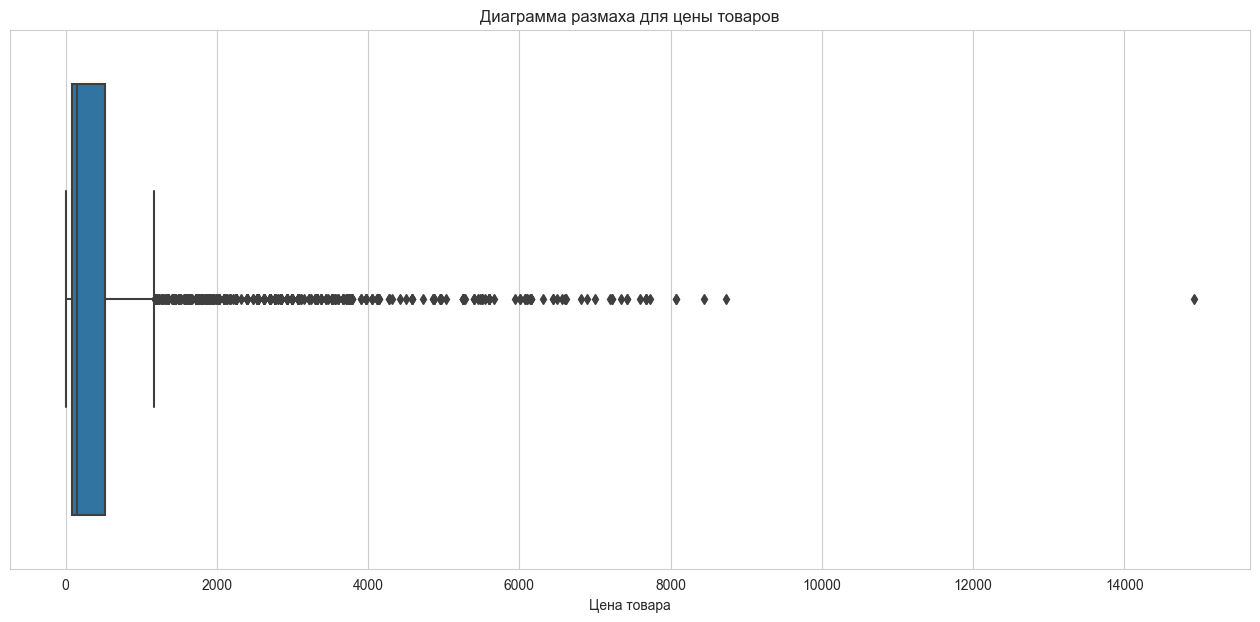

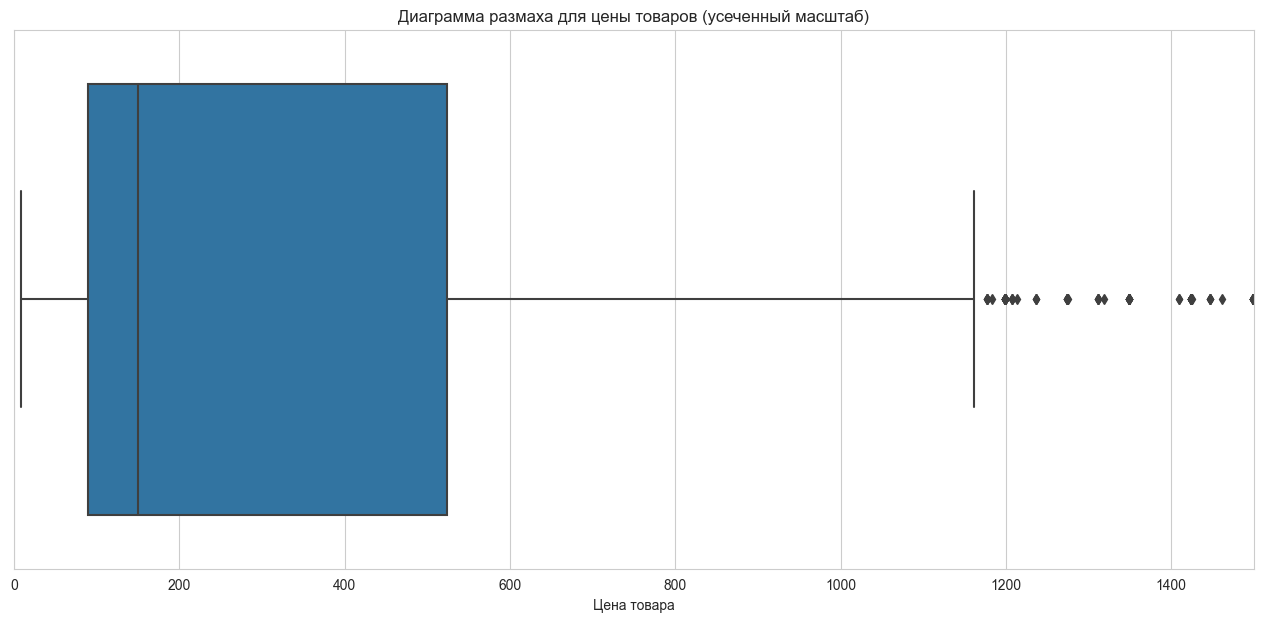

In [20]:
# Строим "ящик с усами"
plt.figure(figsize=(16, 7))
sns.boxplot(data=data, x='price')
plt.title('Диаграмма размаха для цены товаров')
plt.xlabel('Цена товара')
plt.show();

# Также построим диаграмму в усеченном масштабе
plt.figure(figsize=(16, 7))
sns.boxplot(data=data, x='price')
plt.title('Диаграмма размаха для цены товаров (усеченный масштаб)')
plt.xlabel('Цена товара')
plt.xlim(0, 1500)
plt.show();

По диаграмме видно, что граница выбросов проходит чуть ниже 1200 рублей. Также можно отметить достаточно низкое значение медианы, что говорит о большом количестве недорогих товаров в заказах.

Аномальные значения изучены, можно переходить к созданию дополнительных столбцов.

### Создание дополнительных столбцов

Создадим столбец с данными об общей стоимости позиции в заказе, а также столбцы с временем, месяцем и днем недели заказа.

In [21]:
# Общая стоимость позиции
data['total'] = data['quantity'] * data['price']

# Время заказа, при этом уберем секунды
data['time'] = data['date'].dt.time.astype(str).str[:-3]
# Месяц заказа с сохранением года для корректной группировки в дальнейшем
data['month'] = data['date'].astype('datetime64[M]').astype(str).str[:-3]
# День недели заказа
data['weekday'] = data['date'].dt.weekday
# Поскольку время мы вынесли в отдельный столбец, в столбце date оставим только дату
data['date'] = data['date'].dt.date

In [22]:
# Проверим результат
data.info()
data.head(10)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5527 entries, 0 to 5526
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   date         5527 non-null   object 
 1   customer_id  5527 non-null   object 
 2   order_id     5527 non-null   int64  
 3   product      5527 non-null   object 
 4   quantity     5527 non-null   int64  
 5   price        5527 non-null   float64
 6   total        5527 non-null   float64
 7   time         5527 non-null   object 
 8   month        5527 non-null   object 
 9   weekday      5527 non-null   int64  
dtypes: float64(2), int64(3), object(5)
memory usage: 431.9+ KB


date                           customer_id  order_id  \
0  2018-10-01  ee47d746-6d2f-4d3c-9622-c31412542920     68477   
1  2018-10-01  ee47d746-6d2f-4d3c-9622-c31412542920     68477   
2  2018-10-01  ee47d746-6d2f-4d3c-9622-c31412542920     68477   
3  2018-10-01  ee47d746-6d2f-4d3c-9622-c31412542920     68477   
4  2018-10-01  ee47d746-6d2f-4d3c-9622-c31412542920     68477   
5  2018-10-01  ee47d746-6d2f-4d3c-9622-c31412542920     68477   
6  2018-10-01  ee47d746-6d2f-4d3c-9622-c31412542920     68477   
7  2018-10-01  375e0724-f033-4c76-b579-84969cf38ee2     68479   
8  2018-10-01  6644e5b4-9934-4863-9778-aaa125207701     68478   
9  2018-10-01  c971fb21-d54c-4134-938f-16b62ee86d3b     68480   

                                                                    product  \
0                           комнатное растение в горшке алое вера, d12, h30   
1                        комнатное растение в горшке кофе арабика, d12, h25   
2                                               радермахера d-12 см h-20 см   
3                                          хризолидокарпус лутесценс d-9 см   
4                                            циперус зумула d-12 см h-25 см   
5                                                   шеффлера лузеана d-9 см   
6                                          юкка нитчатая d-12 см h-25-35 см   
7                           настенная сушилка для белья gimi brio super 100   
8                  таз пластмассовый 21,0 л круглый "водолей" с614, 1404056   
9  чехол для гладильной доски colombo persia beige 130х50 см из хлопка 5379   

   quantity  price  total   time    month  weekday  
0         1  142.0  142.0  00:00  2018-10        0  
1         1  194.0  194.0  00:00  2018-10        0  
2         1  112.0  112.0  00:00  2018-10        0  
3         1  179.0  179.0  00:00  2018-10        0  
4         1  112.0  112.0  00:00  2018-10        0  
5         1  164.0  164.0  00:00  2018-10        0  
6         1  134.0  134.0  00:00  2018-10        0  
7         1  824.0  824.0  08:00  2018-10        0  
8         1  269.0  269.0  08:00  2018-10        0  
9         1  674.0  674.0  09:00  2018-10        0

## Категоризация товаров

Для категоризации товаров создадим копию столбца product, с которой будем работать. \
Затем последовательно сократим количество слов в наименовании, оставив в итоге два первых.

In [23]:
# Создаем копию столбца product, убираем из названий товаров запятые
data['category_info'] = data['product'].str.replace(',', '')
# Также уберем из всех значений слово "для", поскольку оно часто идет вторым, и не содержит полезной для нас информации
data['category_info'] = data['product'].str.replace(' для ', ' ')
# Убираем все слова и цифры короче трех символов с помощью регулярного выражения
data['category_info'] = data['category_info'].str.replace(r'\b(\w{1,2})\b', '', regex=True)
# Разделяем значения на списки методом split, выбираем первые два элемента и объединяем обратно
data['category_info'] = data['category_info'].str.split().str[0:2].str.join(' ')

# Проверяем результат
data.head()

date                           customer_id  order_id  \
0  2018-10-01  ee47d746-6d2f-4d3c-9622-c31412542920     68477   
1  2018-10-01  ee47d746-6d2f-4d3c-9622-c31412542920     68477   
2  2018-10-01  ee47d746-6d2f-4d3c-9622-c31412542920     68477   
3  2018-10-01  ee47d746-6d2f-4d3c-9622-c31412542920     68477   
4  2018-10-01  ee47d746-6d2f-4d3c-9622-c31412542920     68477   

                                              product  quantity  price  total  \
0     комнатное растение в горшке алое вера, d12, h30         1  142.0  142.0   
1  комнатное растение в горшке кофе арабика, d12, h25         1  194.0  194.0   
2                         радермахера d-12 см h-20 см         1  112.0  112.0   
3                    хризолидокарпус лутесценс d-9 см         1  179.0  179.0   
4                      циперус зумула d-12 см h-25 см         1  112.0  112.0   

    time    month  weekday              category_info  
0  00:00  2018-10        0         комнатное растение  
1  00:00  2018-10        0         комнатное растение  
2  00:00  2018-10        0              радермахера -  
3  00:00  2018-10        0  хризолидокарпус лутесценс  
4  00:00  2018-10        0             циперус зумула

Видно, что у нас есть значение, у которого вместо второго слова дефис. Проверим, как много таких в датасете.

In [24]:
# Используем пробел перед дефисом, чтобы не учитывать слова вроде "сумка-тележка"
data['category_info'].str.contains(' -').sum()

203

Удалим у этих строк дефисы, поскольку они не имеют смысловой нагрузки, и посмотрим итоговое количество уникальных значений.

In [25]:
# Удаляем дефисы там, где это необходимо
data['category_info'] = data['category_info'].str.replace(' -', '')

# Выводим количество уникальных значений до и после обработки
display(data['product'].nunique())
data['category_info'].nunique()

2325

946

Нам удалось существенно сократить количество уникальных значений, но 946 - все еще довольно крупное число. \
Посмотрим, как еще мы можем его уменьшить.

In [26]:
# Выведем и изучим уникальные значения category_info
data['category_info'].unique()

array(['комнатное растение', 'радермахера', 'хризолидокарпус лутесценс',
       'циперус зумула', 'шеффлера лузеана', 'юкка нитчатая',
       'настенная сушилка', 'таз пластмассовый', 'чехол гладильной',
       'вешалка брюк', 'сушилка белья', 'чехол eurogold',
       'корзина мягкая', 'мини-сковорода marmiton',
       'сковорода алюминиевая', 'стеклянная крышка', 'доска гладильная',
       'сумка-тележка', 'многолетнее растение', 'рассада зелени',
       'муляж "райские', 'муляж банан,', 'муляж виноград', 'муляж гранат',
       'муляж груша', 'муляж груша,', 'муляж зеленое', 'муляж клубника',
       'муляж красное', 'муляж лимон,', 'муляж мандарин,', 'муляж перец,',
       'муляж персики', 'муляж томат,', 'муляж черешня', 'щетка-сметка',
       'сумка тележки', 'тарелка обеденная', 'вилка столовая',
       'ложка столовая', 'ложка чайная', 'нож столовый',
       'герань домашняя', 'ерш туалета', 'пеларгония зональная',
       'котел алюминиевый', 'суккулент микс', 'эхеверия перл',
   

Можно отметить, что достаточно часть повторяются слова "рассада", "муляж",  "сумка-тележка". Объединим их все в соответствующие категории, отбросив вторые слова. 

In [27]:
# Используем цикл, чтобы изменить названия категорий
for row in range(len(data)):
    if 'рассада' in data['category_info'][row]:
        data['category_info'][row] = 'рассада'
    elif 'муляж' in data['category_info'][row]:
        data['category_info'][row] = 'муляж'
    elif 'сумка-тележка' in data['category_info'][row]:
        data['category_info'][row] = 'сумка-тележка'

# Проверим результат
data['category_info'].nunique()

870

Нам удалось несколько уменьшить количество значений. Существенную долю данных составляют названия растений, объединить которые автоматизированным способом мы не сможем. Приступим к составлению списков, которые будут содержать ключевые слова, по которым мы присвоим товарам окончательные категории.

In [28]:
# Составляем списки с ключевыми словами для категорий
plants = ['адиантум', 'азалия индика', 'аквилегия', 'алиссум', 'алоэ', 'альбука', 'астра', 'амариллис', 'анемона', 
          'антуриум', 'аптения', 'артемизия', 'аспарагус', 'афеляндра', 'бадан', 'базилик зеленый', 'базилик овощной', 
          'базилик пурпурные', 'бакопа', 'бальзамин', 'барвинок', 'бегония', 'буддлея', 'бузульник', 'валериана', 'вербейник', 
          'вербена',  'вероника', 'виола', 'гайлардия', 'гардения', 'гвоздика садовая', 'гвоздика травянка', 'герань', 
          'гербера', 'гиацинт', 'гимнокалициум', 'гиностемма', 'гипсофила', 'глоксиния', 'гортензия', 'виноград', 'декабрист', 
          'дендробиум санок', 'джункус', 'диффенбахия', 'драцена', 'душица', 'ель канадская', 'замиокулькас', 'зверобой', 
          'змееголовник', 'калла', 'импатиенс', 'иссоп', 'каланхое', 'калатея', 'калибрахоа', 'каллуна', 'калоцефалус', 
          'камнеломка', 'кампанула', 'капсикум', 'арбуз', 'базилик застольный','базилик смесь', 
          'баклажан', 'бархатцы', 'гвоздика стандартная', 'гвоздика турецкая', 'георгина', 'годеция', 'горох', 
          'дендробиум фиолетовый', 'дендробиум яблоневый', 'дыня', 'земляника', 'кабачок', 'календула', 'вигна', 'капуста', 
          'кипарисовик', 'клен', 'клубника', 'кодонанта', 'колокольчик', 'растение', 'кореопсис', 'кориандр', 'космея', 
          'котовник', 'кофе', 'крассула', 'крокусы', 'лаванда', 'лаватера', 'лавр', 'лантана', 'лапчатка', 'лен небесная', 
          'лилейник', 'литопс', 'лобелия', 'лук', 'львиный зев', 'любисток', 'маттиола', 'мединилла', 'мелисса', 'мимоза', 
          'мирт', 'молодило', 'монарда', 'морковь', 'муррайя', 'мускари', 'мята', 'настурция', 'незабудка', 'нефролепис', 
          'нивянник', 'дерево', 'нолина', 'овсянница', 'огурец', 'осина', 'папоротник', 'патиссон', 'пахира', 'пеларгония', 
          'пеперомия', 'петрушка', 'петуния', 'пиретрум', 'платикодон', 'подарочный', 'кашпо', 'подсолнечник', 'примула', 
          'пряные', 'пуансетия', 'пуансеттия', 'радермахера', 'ранункулус', 'рассада', 'роза', 'розмарин', 'рудбекия', 
          'салат рукола', 'сантолина', 'седум', 'сельдерей', 'синнингия', 'скиммия', 'смолевка', 'соланум', 'солидаго',
          'спатифиллум', 'суккулент', 'сциндапсус', 'табак', 'тагетис', 'тимьян', 'томат ', 'томата', 'тыква', 'тюльпан', 
          'укроп', 'фаленопсис', 'фатсия', 'фиалка', 'физостегия', 'фикус', 'фиттония', 'флокс', 'фуксия', 'хамедорея', 
          'хлорофитум', 'хоста', 'хризантема', 'хризолидокарпус', 'цветущее', 'целозия', 'цикламен', 'цинерария', 'цинния', 
          'циперус', 'цитрофортунелла', 'чабер', 'шалфей', 'шеффлера', 'эвкалипт', 'энотера', 'эпипремнум', 'эхеверия', 
          'эхинацея', 'эхинокактус', 'эшшольция', 'юкка', 'ясколка']
    
clothes = ['вешалка', 'вешалки', 'крючок', 'набор вешалок', 'плечики', 'чехол короткой', 'чехол костюма', 'чехол одежды', 
           'чехол платья', 'постельное', 'комплект постельного', 'наволочка', 'наматрасник', 'наматрацник', 'наматрицник', 
           'одеяло', 'пододеяльник', 'подушка', 'покрывало', 'простынь', 'простыня', 'полотенце', 'халат', 'набор кухонных', 
           'плед']
    
house = ['щетка', 'антижир', 'антинакипин', 'средство', 'бак белья', 'бальзам мытья', 'прищепки', 'бензин', 'пакет', 'ванна ', 
         'вантуз', 'ведро', 'веник', 'веревка', 'весы', 'вешалка-сушилка gimi', 'гипоаллергенный', 'гладильная', 'скатерть',
         'губка', 'короб', 'держатель', 'дозатор', 'ерш', 'ёрш', 'мыло', 'насадка', 'соль', 'паста', 'измерительный', 
         'кипятильник', 'ключница', 'ковер', 'ковёр', 'коврик', 'ковш', 'комод', 'комплект ванной', 'комплект махровых', 
         'комплект мытья', 'кондиционер', 'контейнер', 'концентрат', 'корзина', 'корзинка', 'корыто', 'кофр',  
         'лестница', 'линейка', 'ложка обувная', 'мешок', 'инструмент', 'мыльница', 'набор vileda', 'набор ковров', 
         'набор махровых', 'набор пикника', 'набор прецизионных', 'набор прищепок', 'набор сверел', 'сушилка',
         'салфетки', 'обувница', 'окномойка', 'ополаскиватель', 'основание', 'отбеливатель', 'отжим', 'пена', 'перчатки',
         'подголовник', 'подкладка', 'подрукавник', 'подставка обуви', 'подставка цветов', 'покрытие', 'полка', 'полки',
         'пробка', 'пылесос', 'пьезозажигалка', 'рассекатель', 'ролик', 'рукав ', 'салфетка', 'салфетница', 'сверло', 
         'светильник', 'сетка', 'сиденье', 'складная', 'складной', 'скребок клипсами', 'скребок окон', 'сменный', 'сметка', 
         'совок', 'стеллаж обуви', 'стиральный', 'стремянка', 'стремянки', 'стяжки', 'таз ', 'термометр', 'ткань', 'тряпка', 
         'тряпкодержатель', 'увлажняющая', 'урна', 'утюг', 'фал ', 'фен ', 'фоторамка', 'холодная', 'чехол eurogold', 
         'чехол гладильной', 'крем', 'швабра', 'шило', 'шнур', 'шпагат', 'штангенциркуль', 'штора', 'щётка', 'этажерка', 'ящик',
         'завертка', 'карниз', 'кольца', 'крепеж', 'петля', 'решетка', 'ручка', 'стяжка', 'уголок', 'фиксатор', 'штанга']
    
kitchen = ['кружка', 'банка', 'бидон', 'блюд', 'бульонница', 'ваза', 'венчик', 'вилка', 'вкладыши', 'разделочная', 'емкость', 
           'экран', 'измельчитель', 'картофелемялка', 'кастрюля', 'кисточка', 'котел', 'крышка', 'кувшин', 'ножницы', 
           'ложка кухонная', 'ложка столовая', 'ложка чайная', 'столовая ложка', 'чайная ложка', 'лопатка', 'лоток', 
           'мантоварка', 'масленка', 'стакан', 'миксер', 'сковорода', 'миска', 'модульная', 'набор бокалов', 'набор кружек', 
           'набор ножей', 'набор посуды', 'набор стаканов', 'набор столовых', 'набор форм', 'набор фужеров', 
           'набор эмалированных', 'нож', 'овощеварка', 'овощечистка', 'орехоколка', 'отделитель', 'подставка яйца', 'половник', 
           'пресс чеснока', 'просеиватель', 'противень', 'рыбочистка', 'салатник', 'сахарница', 'сито', 'скалка', 
           'скребок кондитерский', 'соковарка', 'соковыжималка', 'сотейник', 'тарелка', 'терка', 'термос', 'толкушка', 
           'тортница', 'форма', 'хлебница', 'чайник', 'чайный набор', 'шприц', 'электроштопор']
    
bags = ['сумка', 'тележка']
    
faux = ['декоративная композиция', 'искусственн', 'муляж']

In [29]:
# Состаавляем список названий категорий
category_names = ['растения, семена и рассада',
                  'одежда, белье и аксессуары',
                  'хозяйственные товары',
                  'посуда и кухонные принадлежности',
                  'сумки и тележки',
                  'муляжи и искуственные цветы']

# И список со списками ключевых слов
category_keys = [plants, clothes, house, kitchen, bags, faux]

Категории подготовлены. Для их присвоения зададим собственную функцию.

In [30]:
def categorize(df, names, keys):
    """"Функция принимает датафрейм df, список names c названиями категорий, список keys со списками ключевых слов для категорий
        После чего на основе данных в столбце category_info присваивает соответствующее значение столбцу category"""
    for i in range(len(keys)):
        check = '|'.join(keys[i])
        df.loc[df['category_info'].str.contains(check, regex=True), 'category'] = names[i]

Все готово для присвоения категорий.

In [31]:
# Создаем столбец category, по умолчанию заполним его значением 'другое'
data['category'] = 'другое'

# Присваиваем категории
categorize(data, category_names, category_keys)

# Проверяем результат
data.head(10)

date                           customer_id  order_id  \
0  2018-10-01  ee47d746-6d2f-4d3c-9622-c31412542920     68477   
1  2018-10-01  ee47d746-6d2f-4d3c-9622-c31412542920     68477   
2  2018-10-01  ee47d746-6d2f-4d3c-9622-c31412542920     68477   
3  2018-10-01  ee47d746-6d2f-4d3c-9622-c31412542920     68477   
4  2018-10-01  ee47d746-6d2f-4d3c-9622-c31412542920     68477   
5  2018-10-01  ee47d746-6d2f-4d3c-9622-c31412542920     68477   
6  2018-10-01  ee47d746-6d2f-4d3c-9622-c31412542920     68477   
7  2018-10-01  375e0724-f033-4c76-b579-84969cf38ee2     68479   
8  2018-10-01  6644e5b4-9934-4863-9778-aaa125207701     68478   
9  2018-10-01  c971fb21-d54c-4134-938f-16b62ee86d3b     68480   

                                                                    product  \
0                           комнатное растение в горшке алое вера, d12, h30   
1                        комнатное растение в горшке кофе арабика, d12, h25   
2                                               радермахера d-12 см h-20 см   
3                                          хризолидокарпус лутесценс d-9 см   
4                                            циперус зумула d-12 см h-25 см   
5                                                   шеффлера лузеана d-9 см   
6                                          юкка нитчатая d-12 см h-25-35 см   
7                           настенная сушилка для белья gimi brio super 100   
8                  таз пластмассовый 21,0 л круглый "водолей" с614, 1404056   
9  чехол для гладильной доски colombo persia beige 130х50 см из хлопка 5379   

   quantity  price  total   time    month  weekday              category_info  \
0         1  142.0  142.0  00:00  2018-10        0         комнатное растение   
1         1  194.0  194.0  00:00  2018-10        0         комнатное растение   
2         1  112.0  112.0  00:00  2018-10        0                радермахера   
3         1  179.0  179.0  00:00  2018-10        0  хризолидокарпус лутесценс   
4         1  112.0  112.0  00:00  2018-10        0             циперус зумула   
5         1  164.0  164.0  00:00  2018-10        0           шеффлера лузеана   
6         1  134.0  134.0  00:00  2018-10        0              юкка нитчатая   
7         1  824.0  824.0  08:00  2018-10        0          настенная сушилка   
8         1  269.0  269.0  08:00  2018-10        0          таз пластмассовый   
9         1  674.0  674.0  09:00  2018-10        0           чехол гладильной   

                     category  
0  растения, семена и рассада  
1  растения, семена и рассада  
2  растения, семена и рассада  
3  растения, семена и рассада  
4  растения, семена и рассада  
5  растения, семена и рассада  
6  растения, семена и рассада  
7        хозяйственные товары  
8        хозяйственные товары  
9        хозяйственные товары

Функция отработала успешно. Проверим уникальные значения столбца category, и как записи распределились по категориям.

In [32]:
data.pivot_table(index='category', values='order_id', aggfunc='count').sort_values(by='order_id', ascending=False)

order_id
category                                  
растения, семена и рассада            2785
хозяйственные товары                  1484
посуда и кухонные принадлежности       406
сумки и тележки                        380
муляжи и искуственные цветы            308
одежда, белье и аксессуары             164

Сразу выделяются два лидера - растения и хозтовары. Значения "другое" нет, значит, все записи попали в категории. \
Окончательно приведем датасет в порядок, прежде чем приступать к исследовательскому анализу.

In [33]:
# Удалим столбец category_info
data = data.drop(columns='category_info')

# Изменим порядок столбцов
data = data[['date','time', 'customer_id', 'order_id', 'category', 'product', 'quantity', 'price', 'total', 'month', 'weekday']]

# Проверим результат
data.head()

date   time                           customer_id  order_id  \
0  2018-10-01  00:00  ee47d746-6d2f-4d3c-9622-c31412542920     68477   
1  2018-10-01  00:00  ee47d746-6d2f-4d3c-9622-c31412542920     68477   
2  2018-10-01  00:00  ee47d746-6d2f-4d3c-9622-c31412542920     68477   
3  2018-10-01  00:00  ee47d746-6d2f-4d3c-9622-c31412542920     68477   
4  2018-10-01  00:00  ee47d746-6d2f-4d3c-9622-c31412542920     68477   

                     category  \
0  растения, семена и рассада   
1  растения, семена и рассада   
2  растения, семена и рассада   
3  растения, семена и рассада   
4  растения, семена и рассада   

                                              product  quantity  price  total  \
0     комнатное растение в горшке алое вера, d12, h30         1  142.0  142.0   
1  комнатное растение в горшке кофе арабика, d12, h25         1  194.0  194.0   
2                         радермахера d-12 см h-20 см         1  112.0  112.0   
3                    хризолидокарпус лутесценс d-9 см         1  179.0  179.0   
4                      циперус зумула d-12 см h-25 см         1  112.0  112.0   

     month  weekday  
0  2018-10        0  
1  2018-10        0  
2  2018-10        0  
3  2018-10        0  
4  2018-10        0

Данные подготовлены и категоризированы, можно приступать к анализу.

## Исследовательский анализ

### Динамика количества уникальных покупателей и заказов

Начнем с изучения количества уникальных покупателей и заказов в каждом месяце. 

unique_customers  unique_orders
month                                   
2018-10               177            236
2018-11               176            202
2018-12               226            276
2019-01               148            164
2019-02               245            287
2019-03               227            242
2019-04               235            264
2019-05               163            177
2019-06               147            156
2019-07               186            198
2019-08               164            172
2019-09               170            178
2019-10               169            198
2019-11               217            217
2019-12               246            246
2020-01               269            269

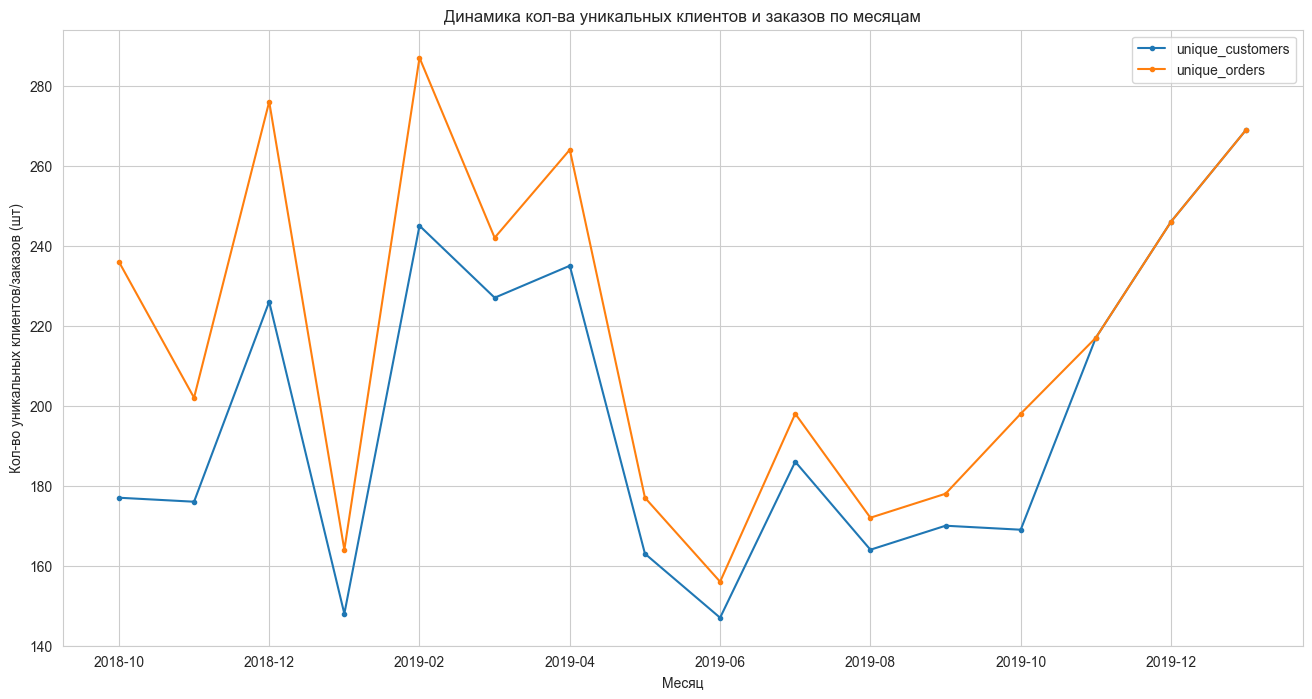

In [34]:
# Формируем сводную таблицу по месяцам
customers_and_orders = (data.pivot_table(index='month', values=['customer_id', 'order_id'], aggfunc='nunique')
                            .rename(columns={'customer_id': 'unique_customers', 'order_id': 'unique_orders'}))
display(customers_and_orders)

# Визуализируем данные на графике
(customers_and_orders.plot(style='.-', figsize=(16, 8), rot=0,
                           title='Динамика кол-ва уникальных клиентов и заказов по месяцам',
                           xlabel='Месяц', ylabel='Кол-во уникальных клиентов/заказов (шт)'));

В целом число уникальных покупателей и заказов за наблюдаемый период изменялось практически синхронно, что говорит о том, что среднее количество заказов на покупателя практически не менялось. В январе и мая 2019-го оба показателя существенно проседали, но начиная с августа демонстрируют стабильный рост.

Интересно, что в последние три месяца число уникальных заказов совпадает с числом уникальных покупателей, что означает, что каждый покупатель сделал лишь один заказ. Полное отсутствие повторных покупок - нехороший знак.

### Динамика общей выручки и выручки по категориям

Перейдем к изучению динамики выручки магазина.

total
month             
2018-10  338964.00
2018-11  342418.00
2018-12  338049.00
2019-01  226936.00
2019-02  305242.00
2019-03  249188.00
2019-04  316469.00
2019-05  221454.00
2019-06  178744.00
2019-07  235410.00
2019-08  172100.00
2019-09  174351.00
2019-10  199061.00
2019-11  128791.75
2019-12  202885.33
2020-01  174036.33

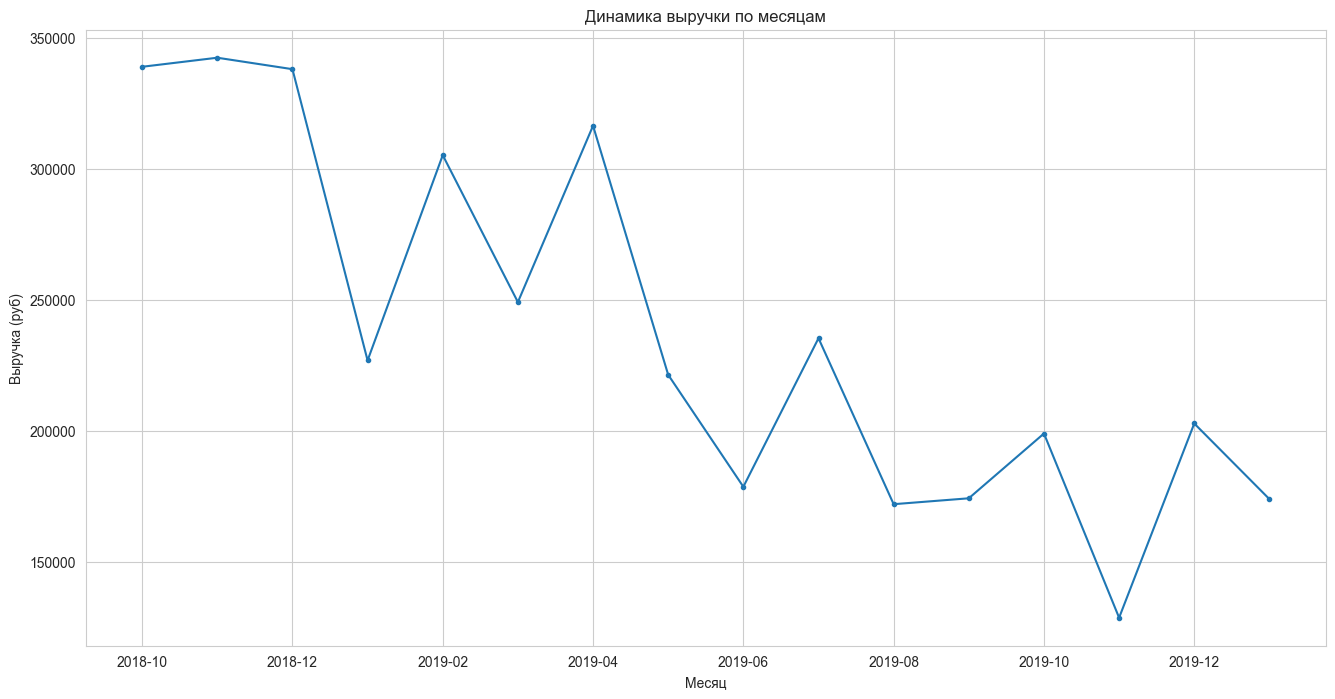

In [35]:
# Формируем сводную таблицу по месяцам
revenue = data.pivot_table(index='month', values='total', aggfunc='sum').round(2)
display(revenue)

# Визуализируем данные на графике
(revenue.plot(style='.-', figsize=(16, 8), rot=0, legend=False,
              title='Динамика выручки по месяцам',
              xlabel='Месяц', ylabel='Выручка (руб)'));

Видно, что за наблюдаемый период с октября 2018 по январь 2020 выручка магазина существенно снизилась. Таким образом, рост количества заказов в последние месяцы не повлек за собой рост выручки. Можно отметить три месяца с существенным падением продаж: январь 2019, май 2019 и ноябрь 2019. Интересно, что первые два месяца совпадают с месяцами в которые снижалось количество заказов, тогда как в ноябре 2019 по отношению к октябрю количетво заказов выросло.

Посмотрим на выручку в разбивке по категориям товаров.

category  муляжи и искуственные цветы  одежда, белье и аксессуары  \
month                                                               
2018-10                      11393.00                     22664.0   
2018-11                       7736.00                     25338.0   
2018-12                       3633.00                     26813.0   
2019-01                       2864.00                     65474.0   
2019-02                      16965.00                      4176.0   
2019-03                       9977.00                      3594.0   
2019-04                       6595.00                     36464.0   
2019-05                       1606.00                      2837.0   
2019-06                       3154.00                      9586.0   
2019-07                       4735.00                      4754.0   
2019-08                       1272.00                      4388.0   
2019-09                       1056.00                      6163.0   
2019-10                       5986.00                      9867.0   
2019-11                        672.67                      9476.0   
2019-12                        435.33                      7527.0   
2020-01                       1063.33                      3924.0   

category  посуда и кухонные принадлежности  растения, семена и рассада  \
month                                                                    
2018-10                            24812.0                    30575.00   
2018-11                            58298.0                    19369.00   
2018-12                            30489.0                    28997.00   
2019-01                            28742.0                    23473.00   
2019-02                            23083.0                    31407.00   
2019-03                            18562.0                    50724.00   
2019-04                             5353.0                    94189.00   
2019-05                             9364.0                   113037.00   
2019-06                             3940.0                    38248.00   
2019-07                             7455.0                    37069.00   
2019-08                             8014.0                    16394.00   
2019-09                            19514.0                    19553.00   
2019-10                             6251.0                    17425.00   
2019-11                             9952.5                    17377.17   
2019-12                             8554.0                    17797.00   
2020-01                            14853.5                    19306.17   

category  сумки и тележки  хозяйственные товары  
month                                            
2018-10          48527.00             200993.00  
2018-11          77874.00             153803.00  
2018-12         105904.00             142213.00  
2019-01          17790.00              88593.00  
2019-02          62044.00             167567.00  
2019-03          58631.00             107700.00  
2019-04          72838.00             101030.00  
2019-05          39964.00              54646.00  
2019-06          32509.00              91307.00  
2019-07          44439.00             136958.00  
2019-08          60187.00              81845.00  
2019-09          38741.00              89324.00  
2019-10          46433.00             113099.00  
2019-11          28815.75              62497.67  
2019-12          63094.50             105477.50  
2020-01          28290.00             106599.33

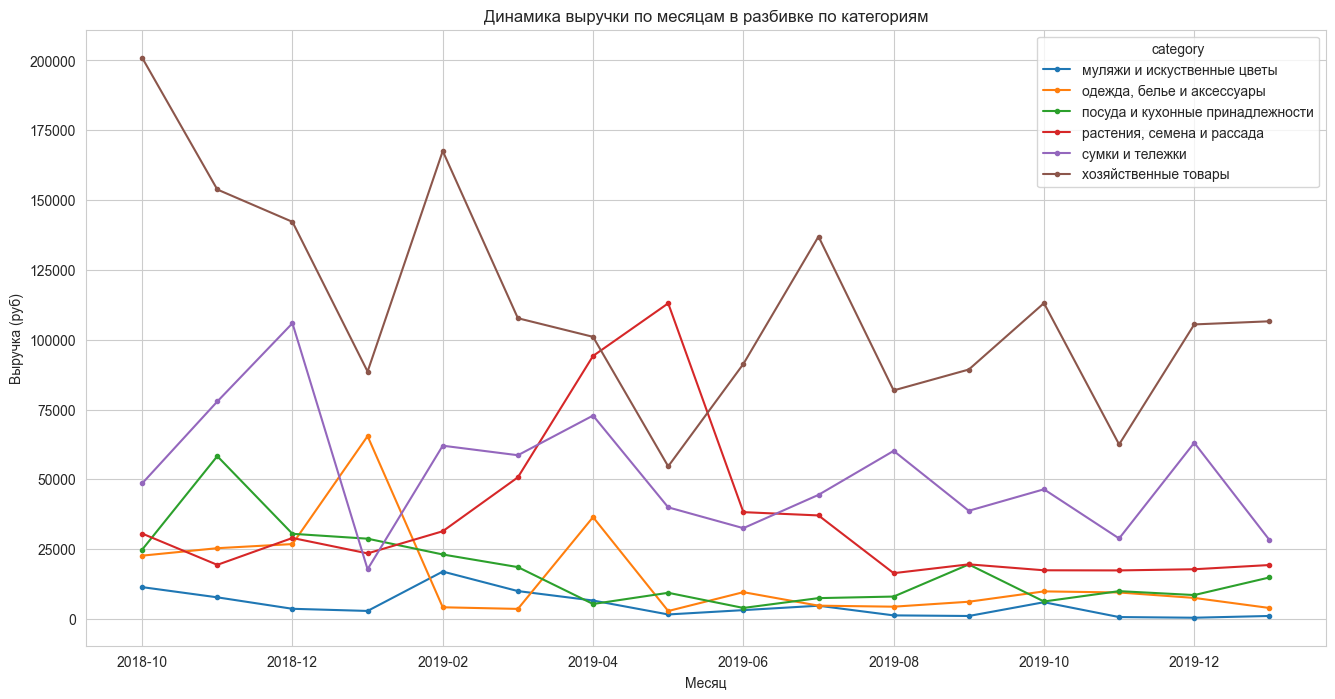

In [36]:
# Формируем сводную таблицу
revenue_by_category = data.pivot_table(index='month', columns='category', values='total', aggfunc='sum').round(2)
display(revenue_by_category)

# Визуализируем данные
(revenue_by_category.plot(style='.-', figsize=(16, 8), rot=0,
                          title='Динамика выручки по месяцам в разбивке по категориям',
                          xlabel='Месяц', ylabel='Выручка (руб)'));

Лидирующие по выручке категории - это "хозяйственные товары" и "сумки и тележки". Видно, что в месяцы, когда существенно "проседала" общая выручка (январь 2019, май 2019 и ноябрь 2019), это происходило за счет снижения продаж в этих товарных группах.

Также можно отметить, что категория "растения, семена и рассада" достаточно стабильно росла вплоть до мая 2019 года, когда даже вышла в лидеры по выручке, однако в июне продажи резко сократились. Это отчасти можно объяснить сезонностью спроса.

Дополнительно визуализировать, как менялась доля каждой категории в общей выручке, можно с помощью Plotly Express. Выводы, сделанные по линейному графику, будут применимы и к интерактивному графику.

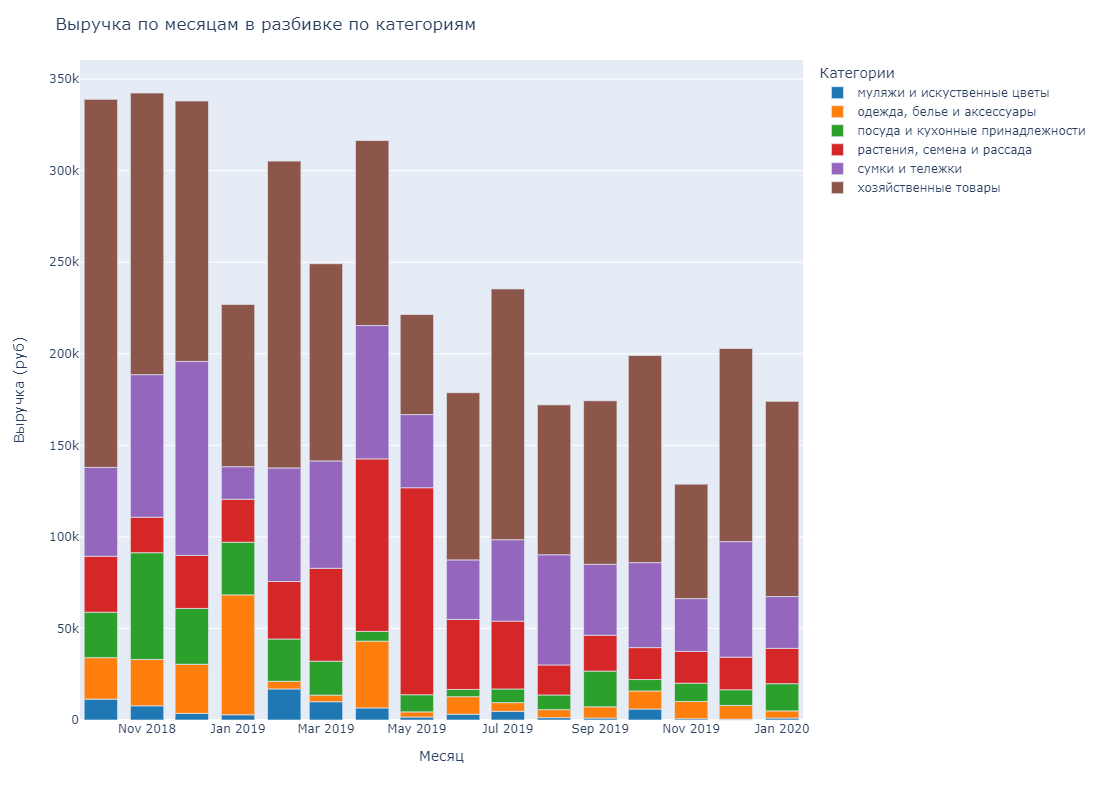

In [37]:
# Используем Plotly Express, с помощью параметра color_discrete_sequence зададим категориям те же цвета, что на графике выше
fig = px.bar(revenue_by_category, x=revenue_by_category.index.values, y=revenue_by_category.columns.values, 
             color_discrete_sequence=px.colors.qualitative.D3)
fig.update_layout(title='Выручка по месяцам в разбивке по категориям', legend_title_text='Категории',
                  xaxis_title='Месяц', yaxis_title='Выручка (руб)',  
                  width=985, height=800)
fig.show()

### Динамика медианной выручки с одного заказа

Продолжим выяснять, что привело к падению выручки в последние месяцы. Изучим динамику медианной выручки с одного заказа.

total
month         
2018-10  932.5
2018-11  894.0
2018-12  743.5
2019-01  613.0
2019-02  599.0
2019-03  644.5
2019-04  598.5
2019-05  830.0
2019-06  599.5
2019-07  599.5
2019-08  579.5
2019-09  599.0
2019-10  524.0
2019-11  187.0
2019-12  195.0
2020-01  188.0

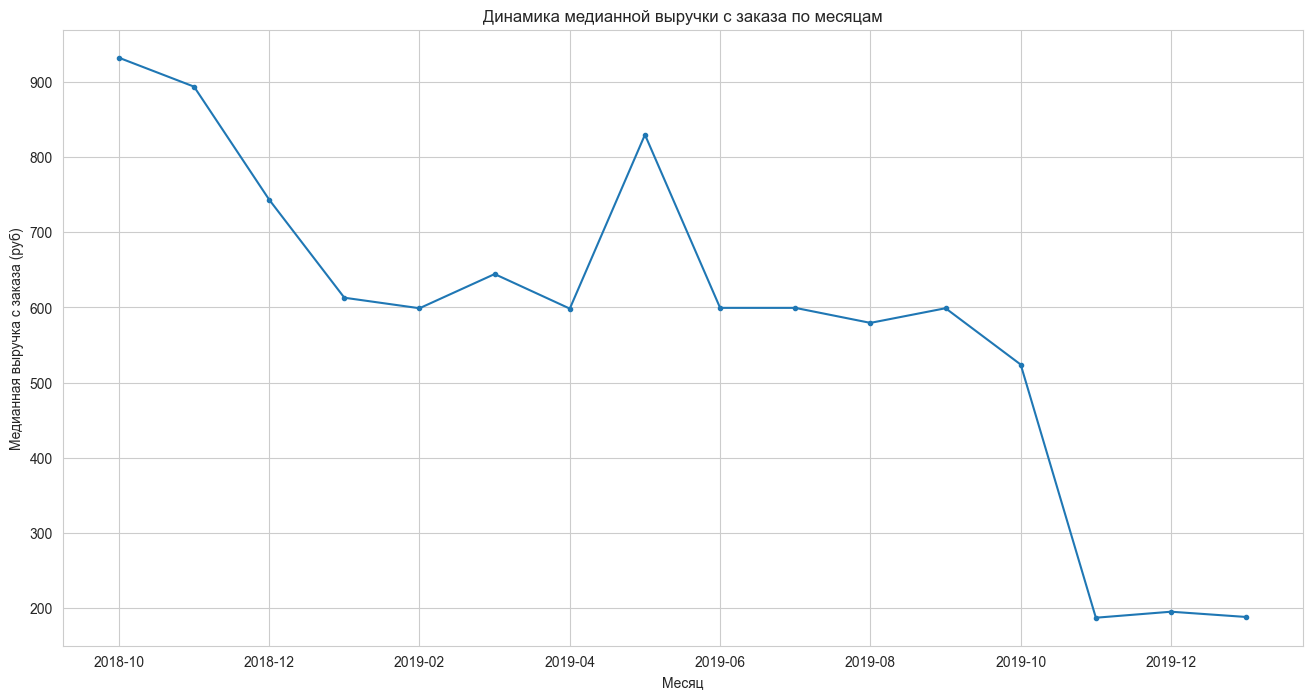

In [38]:
# Формируем сводную таблицу: сначала находим суммы всех заказов в каждом месяце, затем медианное значение для них
order_total_monthly =(data.groupby(['month', 'order_id']).agg({'total': 'sum'})
                          .groupby('month').agg({'total': 'median'}))
display(order_total_monthly)

# Визуализируем данные
(order_total_monthly.plot(style='.-', figsize=(16, 8), rot=0, legend=False,
                          title='Динамика медианной выручки с заказа по месяцам',
                          xlabel='Месяц', ylabel='Медианная выручка с заказа (руб)'));

Видно, что в последние три месяца медианная выручка с одного заказа упала почти в 3 раза, ниже 200 рублей. Параллельно, как мы определили в пункте 5.1, происходил рост количества заказов, но этого было недостаточно, чтобы компенсировать падение медианной выручки.

Изучим составляющие выручки от заказа, чтобы определить причину ее сокращения.

### Медианная стоимость товара по категориям

Визуализируем медианную стоимость товара для всех категорий.

price
category                                
сумки и тележки                   1087.0
хозяйственные товары               599.0
одежда, белье и аксессуары         216.5
посуда и кухонные принадлежности   194.0
растения, семена и рассада         128.0
муляжи и искуственные цветы         52.0

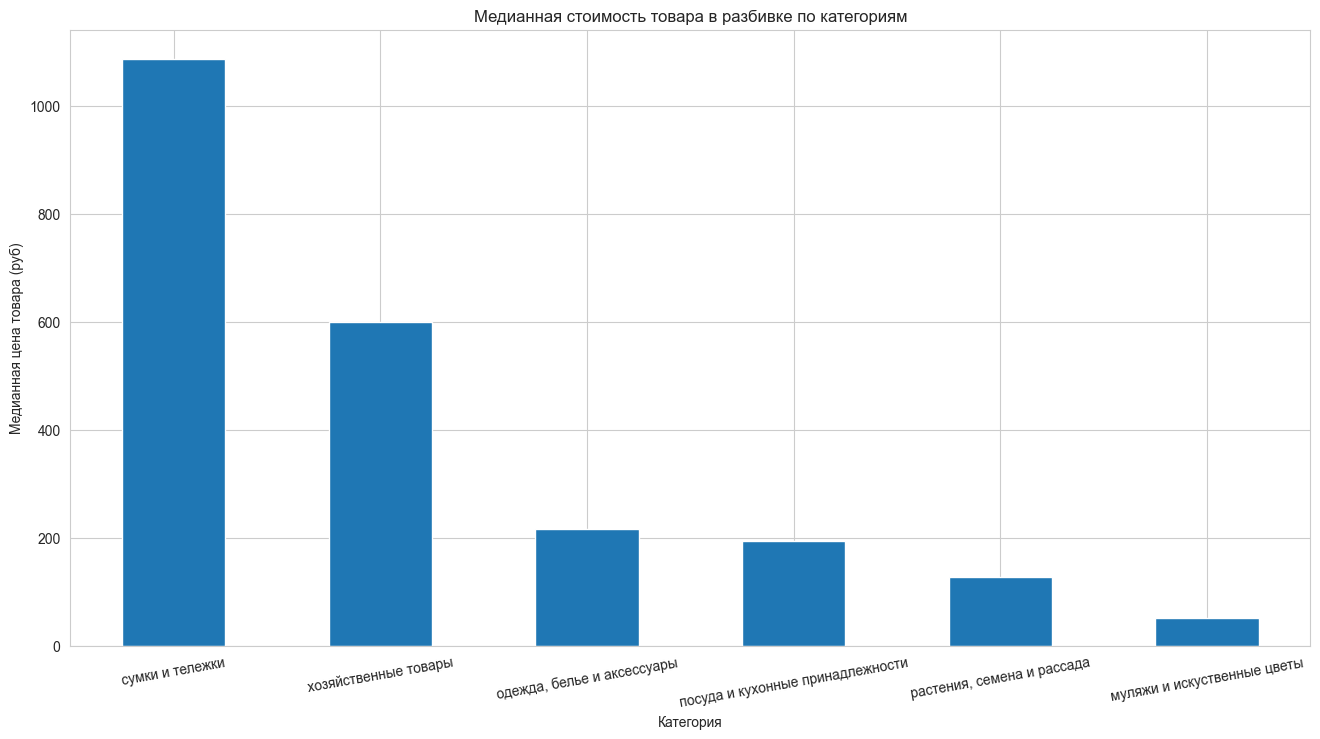

In [39]:
# Рассчитаем медианную стоимость товара по категориям
median_category_prices = data.groupby('category').agg({'price': 'median'}).sort_values(by='price', ascending=False)
display(median_category_prices)

# Визуализируем данные
(median_category_prices.plot(kind='bar', figsize=(16, 8), rot=10, legend=False,
                             title='Медианная стоимость товара в разбивке по категориям',
                             xlabel='Категория', ylabel='Медианная цена товара (руб)'));

Выводы из пункта 5.2 подтверждаются в расчетах медианной стоимости товаров - категории "сумки и тележки" и "хозяйственные товары" лидируют с большим преимуществом, а "муляжи и искуственные цветы" является замыкающей.

Теперь изучим, как медианная стомость менялась во времени, и могло ли это быть причиной сокращения выручки.

category  муляжи и искуственные цветы  одежда, белье и аксессуары  \
month                                                               
2018-10                         52.00                       202.0   
2018-11                         59.00                       187.0   
2018-12                         59.00                       712.0   
2019-01                         59.00                       247.0   
2019-02                         50.00                       156.5   
2019-03                         59.00                       374.0   
2019-04                         37.00                       232.0   
2019-05                         22.00                       265.5   
2019-06                         52.00                       164.0   
2019-07                         45.00                        89.0   
2019-08                         37.00                       326.5   
2019-09                         22.00                       329.0   
2019-10                         44.00                       202.0   
2019-11                         57.33                       224.0   
2019-12                         28.00                       209.0   
2020-01                         53.83                       134.0   

category  посуда и кухонные принадлежности  растения, семена и рассада  \
month                                                                    
2018-10                              187.0                       150.0   
2018-11                              123.0                       149.0   
2018-12                              187.0                       149.0   
2019-01                              245.0                       150.0   
2019-02                              258.0                       135.0   
2019-03                              254.0                       134.0   
2019-04                              239.0                       112.0   
2019-05                              186.0                       120.0   
2019-06                              164.0                       120.0   
2019-07                              367.0                       120.0   
2019-08                              183.0                       135.0   
2019-09                              449.0                       134.5   
2019-10                              194.5                       145.5   
2019-11                              156.5                       114.0   
2019-12                              194.0                       119.5   
2020-01                              217.0                       119.0   

category  сумки и тележки  хозяйственные товары  
month                                            
2018-10           1049.00                 524.0  
2018-11           1649.00                 419.5  
2018-12           1049.00                 637.0  
2019-01           1574.00                 712.0  
2019-02           1649.00                 708.0  
2019-03           1087.00                 742.0  
2019-04           1330.50                 543.0  
2019-05           1649.00                 509.0  
2019-06            749.00                 487.0  
2019-07           1124.00                 614.0  
2019-08           1087.00                 606.5  
2019-09           1087.00                 599.5  
2019-10           1087.00                 637.5  
2019-11           1087.00                 487.0  
2019-12           2905.25                 629.0  
2020-01           2774.00                 638.0

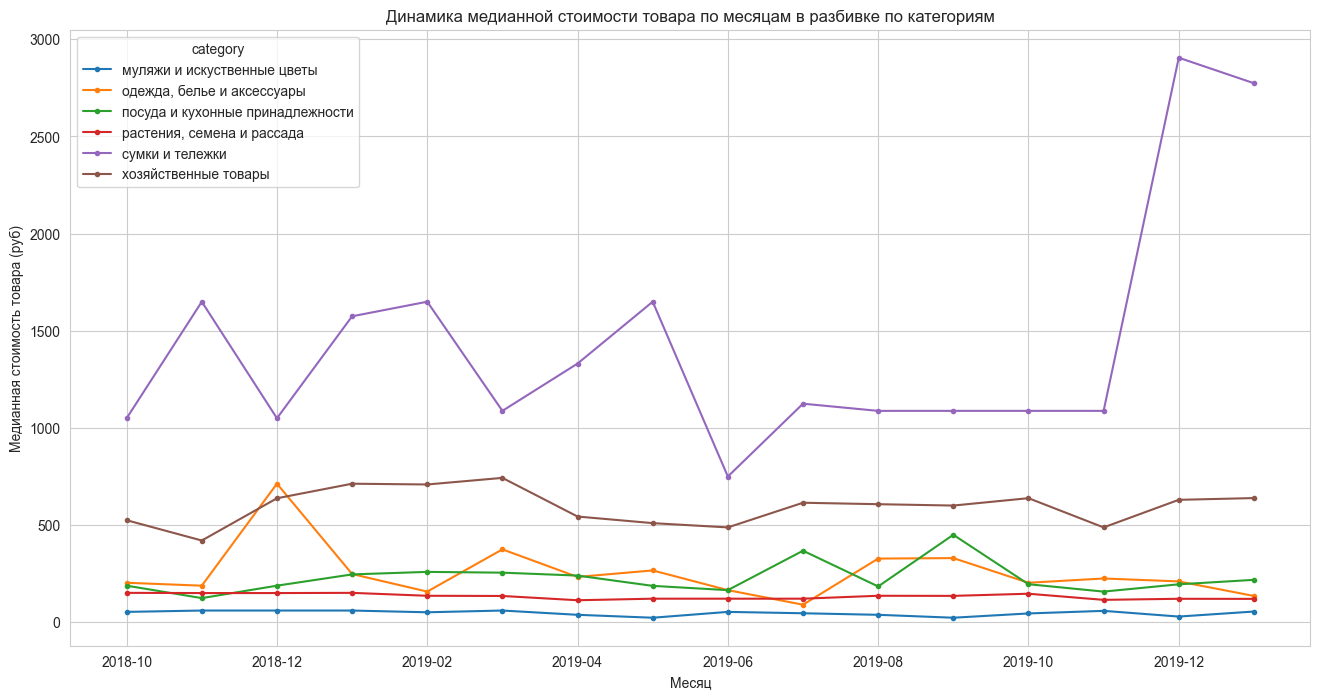

In [40]:
# Формируем сводную таблицу
monthly_median_prices = data.pivot_table(index='month', columns='category', values='price', aggfunc='median').round(2)
display(monthly_median_prices)

# Визуализируем данные
(monthly_median_prices.plot(style='.-', figsize=(16, 8), rot=0,
                            title='Динамика медианной стоимости товара по месяцам в разбивке по категориям',
                            xlabel='Месяц', ylabel='Медианная стоимость товара (руб)'));

Видно, что в целом за наблюдаемый период цены на покупаемые товары оставались относительно стабильными, но существенный разброс значений демонстрирует категория "сумки и тележки". Возможно, это объясняется совокупностью небольших продаж в штучном выражении и высоких цен - изучим это в следующем пункте. 

### Распределение выручки и количества проданных товаров по категориям

Посмотрим, как по категориям распределились общая выручка и количество проданных единиц товара.

revenue  quantity
category                                              
хозяйственные товары              1803652.50      3033
сумки и тележки                    826081.25       445
растения, семена и рассада         574940.33      4087
посуда и кухонные принадлежности   277237.00      1100
одежда, белье и аксессуары         243045.00       704
муляжи и искуственные цветы         79143.33      1640

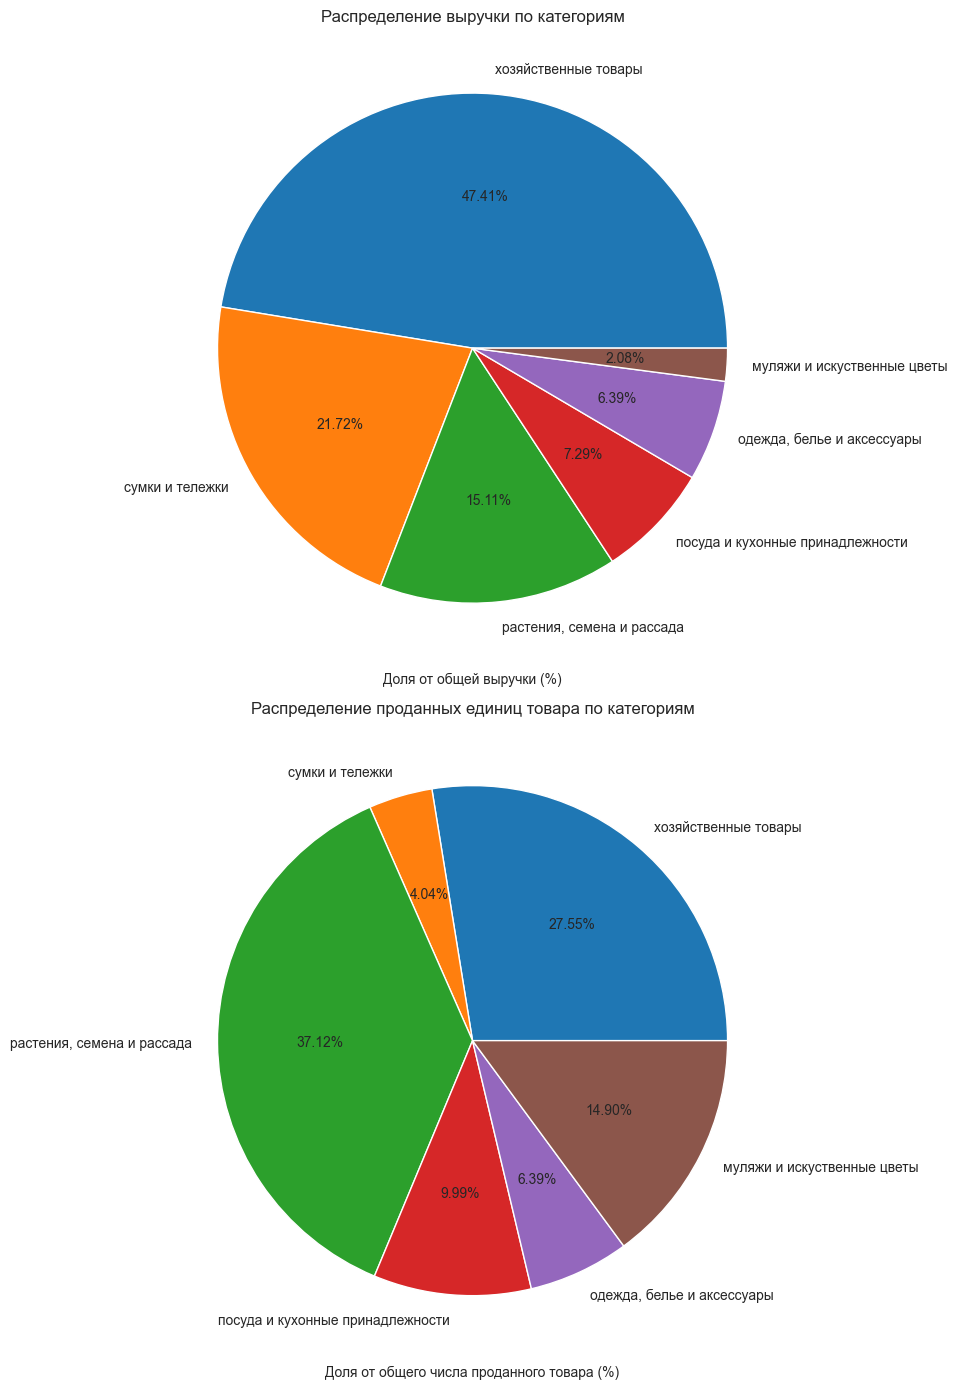

In [41]:
# Формируем сводную таблицу с общей выручкой по категориям
total_revenue_by_category = (data.pivot_table(index='category', values='total', aggfunc='sum')
                                 .round(2)
                                 .rename(columns={'total': 'revenue'})
                                 .sort_values(by='revenue', ascending=False))

# Формируем сводную таблицу с количеством проданных единиц товара по категориям
total_items_by_category = (data.pivot_table(index='category', values='quantity', aggfunc='sum')
                                 .sort_values(by='quantity', ascending=False))

# Объединяем таблицы в одну
category_data = total_revenue_by_category.merge(total_items_by_category, on='category')
display(category_data)

# Визуализируем данные
plt.figure(figsize=(16, 14))

# Круговая диаграмма для выручки
category_data.plot(kind='pie', y='revenue', ax=plt.subplot(2, 1, 1), autopct='%1.2f%%', legend=False)
plt.title('Распределение выручки по категориям')
plt.xlabel('Доля от общей выручки (%)')
plt.ylabel('')

# Круговая диаграмма для количества проданных товаров
category_data.plot(kind='pie', y='quantity', ax=plt.subplot(2, 1, 2), autopct='%1.2f%%', legend=False)
plt.title('Распределение проданных единиц товара по категориям')
plt.xlabel('Доля от общего числа проданного товара (%)')
plt.ylabel('')

plt.tight_layout()
plt.show()

Видно, что средняя стоимость товара от категории к категории существенно отличается. Так, на вторую по выручке категорию "сумки и тележки" приходится лишь 4.04% от общего числа проданных товаров, и наоборот, категория "растения, семена и рассада", которая существенно лидирует по количеству проданных единиц товара, по выручке находится лишь на третьем месте. Категория "хозяйственные товары" составляет почти половину от общей выручки и больше четверти от проданных единиц товара.

Предположение из предыдущего пункта о том, что причиной для колебаний медианной стоимости товара у категории "сумки и тележки" служит малый объем продаж в штуках, подтвердилось.

### Количество товаров в одном заказе по месяцам

Мы определили, что в последние несколько месяцев медианная стоимость товаров в категориях существенно не менялась, и количество заказов росло, но выручка при этом снижалась. Можно сделать предположение, что причина кроется в количестве товаров, которое покупатели приобретали в одном заказе. Изучим это.

quantity    1     2     3     4     5    6    7    8    9     10   ...  48   \
month                                                              ...        
2018-10   123.0  22.0  22.0  20.0   8.0  3.0  2.0  2.0  1.0  12.0  ...  NaN   
2018-11   109.0  21.0  14.0   9.0  10.0  7.0  1.0  1.0  3.0   7.0  ...  1.0   
2018-12   203.0  35.0   9.0   6.0   2.0  3.0  NaN  3.0  2.0   NaN  ...  NaN   
2019-01   115.0  14.0   8.0   3.0   2.0  6.0  4.0  1.0  NaN   3.0  ...  NaN   
2019-02   199.0  28.0  11.0   5.0   7.0  5.0  3.0  NaN  NaN  10.0  ...  NaN   
2019-03   157.0  21.0  11.0   8.0   2.0  6.0  2.0  2.0  2.0   5.0  ...  NaN   
2019-04   145.0  22.0  16.0  10.0   6.0  4.0  4.0  9.0  3.0   7.0  ...  NaN   
2019-05    76.0  13.0   7.0  10.0   4.0  6.0  7.0  4.0  8.0   2.0  ...  NaN   
2019-06    92.0  16.0   8.0   7.0   6.0  2.0  1.0  5.0  1.0   8.0  ...  NaN   
2019-07   135.0  17.0   7.0   6.0   6.0  5.0  4.0  NaN  2.0   9.0  ...  NaN   
2019-08   135.0   6.0   7.0   6.0   8.0  1.0  2.0  1.0  NaN   1.0  ...  NaN   
2019-09   138.0  15.0   6.0   4.0   4.0  NaN  NaN  NaN  1.0   4.0  ...  NaN   
2019-10   150.0  24.0   6.0   3.0   1.0  1.0  1.0  1.0  NaN   3.0  ...  NaN   
2019-11   198.0  19.0   NaN   NaN   NaN  NaN  NaN  NaN  NaN   NaN  ...  NaN   
2019-12   227.0  19.0   NaN   NaN   NaN  NaN  NaN  NaN  NaN   NaN  ...  NaN   
2020-01   237.0  32.0   NaN   NaN   NaN  NaN  NaN  NaN  NaN   NaN  ...  NaN   

quantity  50   51   55   57   59   60   64   100  101  
month                                                  
2018-10   2.0  NaN  NaN  NaN  NaN  NaN  1.0  1.0  NaN  
2018-11   NaN  NaN  NaN  NaN  NaN  1.0  NaN  NaN  1.0  
2018-12   NaN  NaN  NaN  1.0  NaN  NaN  NaN  NaN  NaN  
2019-01   1.0  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  
2019-02   2.0  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  
2019-03   NaN  NaN  1.0  NaN  NaN  NaN  NaN  NaN  NaN  
2019-04   NaN  1.0  1.0  NaN  1.0  2.0  NaN  NaN  NaN  
2019-05   NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  
2019-06   NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  
2019-07   NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  
2019-08   NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  
2019-09   NaN  NaN  NaN  NaN  NaN  1.0  NaN  NaN  NaN  
2019-10   2.0  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  
2019-11   NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  
2019-12   NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  
2020-01   NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  

[16 rows x 48 columns]

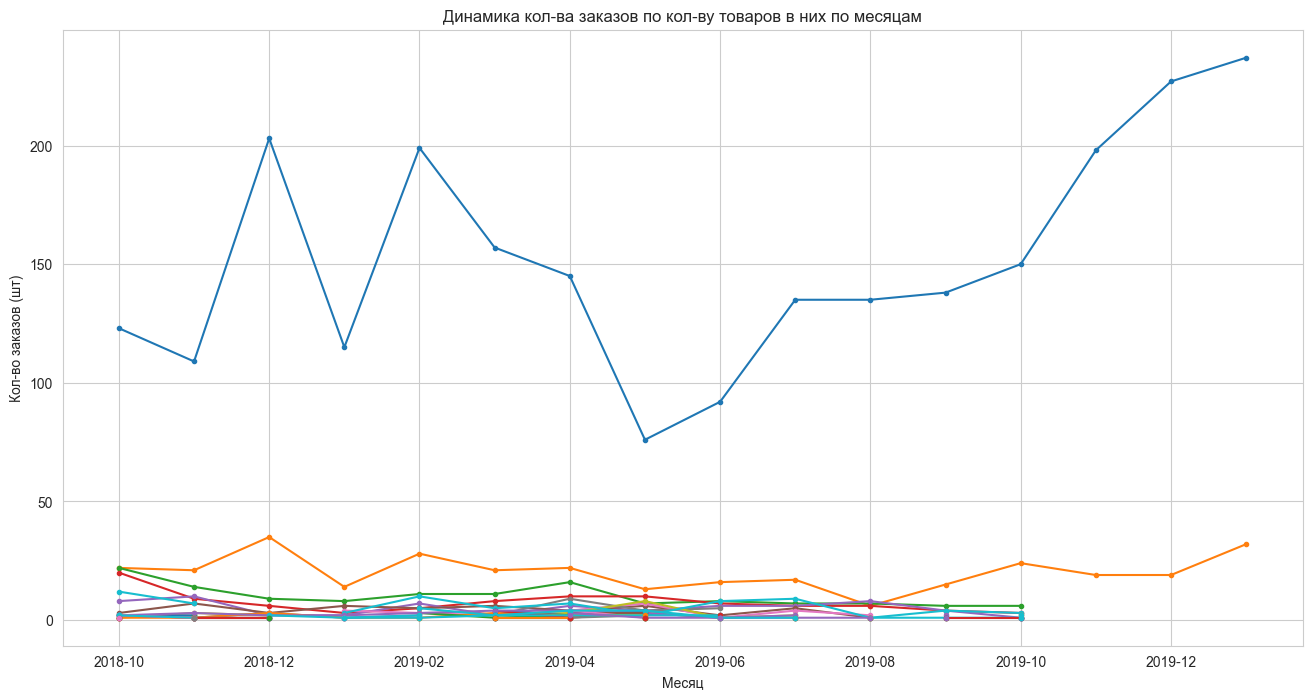

In [42]:
# Формируем сводную таблицу с количеством заказов с определенным количеством товаров в них в каждый месяц
order_items_monthly = (data.groupby(['month', 'order_id']).agg({'quantity': 'sum'}).reset_index()
                           .pivot_table(index='month', columns='quantity', values='order_id', aggfunc='count'))
display(order_items_monthly)

# Визуализируем данные
(order_items_monthly.plot(style='.-', figsize=(16, 8), rot=0, legend=False,
                          title='Динамика кол-ва заказов по кол-ву товаров в них по месяцам',
                          xlabel='Месяц', ylabel='Кол-во заказов (шт)'));

За счет большого количества элементов график не очень хорошо читается, но можно заметить, что после октября 2019 вcе линии, кроме двух, обрываются. Усечем масштаб, чтобы сделать график более читаемым.

quantity     1     2    3    4    5    6    7    8    10   12   20   24   25  \
month                                                                          
2019-10   150.0  24.0  6.0  3.0  1.0  1.0  1.0  1.0  3.0  2.0  1.0  1.0  1.0   
2019-11   198.0  19.0  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN   
2019-12   227.0  19.0  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN   
2020-01   237.0  32.0  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN   

quantity   30   50  
month               
2019-10   1.0  2.0  
2019-11   NaN  NaN  
2019-12   NaN  NaN  
2020-01   NaN  NaN

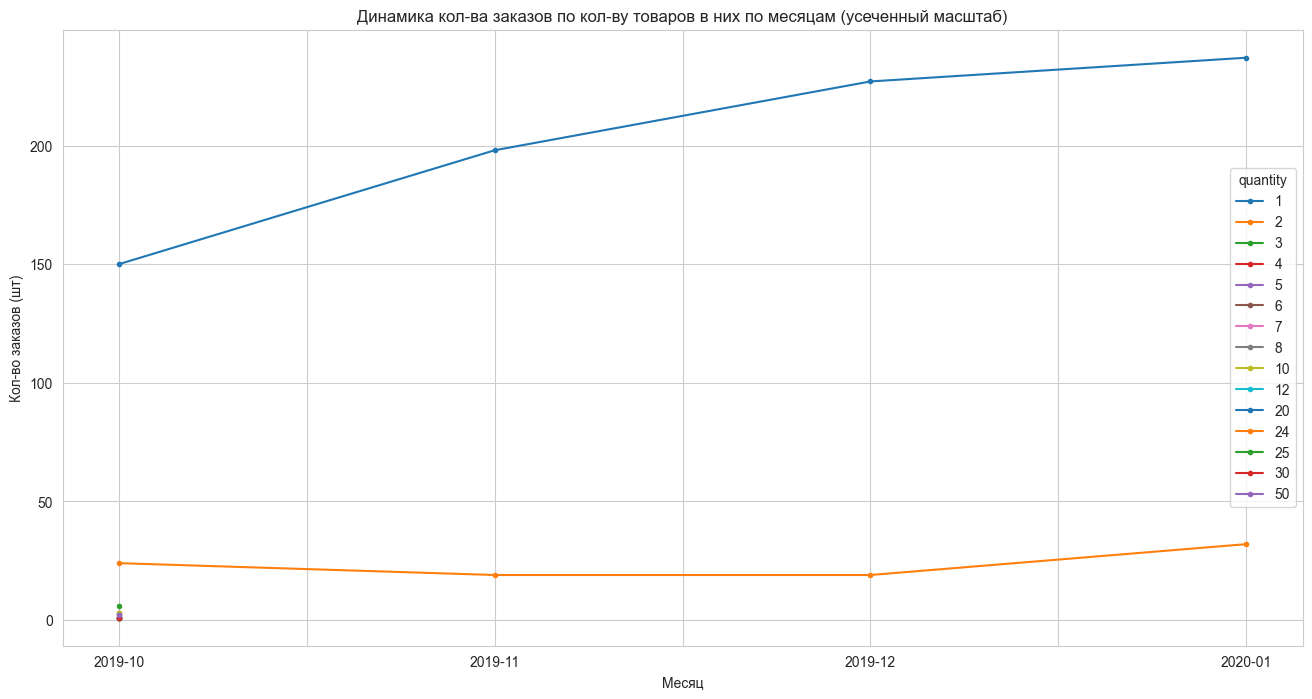

In [43]:
# Оставляем только данные с октября 2019 и позже, удаляем столбцы, которые полностью состоят из пропусков
order_items_monthly = order_items_monthly[-4:].dropna(axis=1, how='all')
display(order_items_monthly)

# Визуализируем данные
(order_items_monthly.plot(style='.-', figsize=(16, 8), rot=0, 
                          title='Динамика кол-ва заказов по кол-ву товаров в них по месяцам (усеченный масштаб)',
                          xlabel='Месяц', ylabel='Кол-во заказов (шт)'));

Видно, что в октябре 2019 были заказы на 25, 30 и даже 50 предметов, а начиная с ноября, не было ни одного заказа с количеством товаров больше двух. Это и послужило основной причиной сокращения выручки с заказа, которое мы выявили в  пункте 5.3, и, как следствие, общей выручки.

### Количество заказов и товаров в них по дням недели

Изучим, как менялось количество заказов в зависимости от дня недели. Для начала посмотрим на картину для датасета в целом.

order_id
понедельник       574
вторник           593
среда             535
четверг           542
пятница           456
суббота           344
воскресенье       447

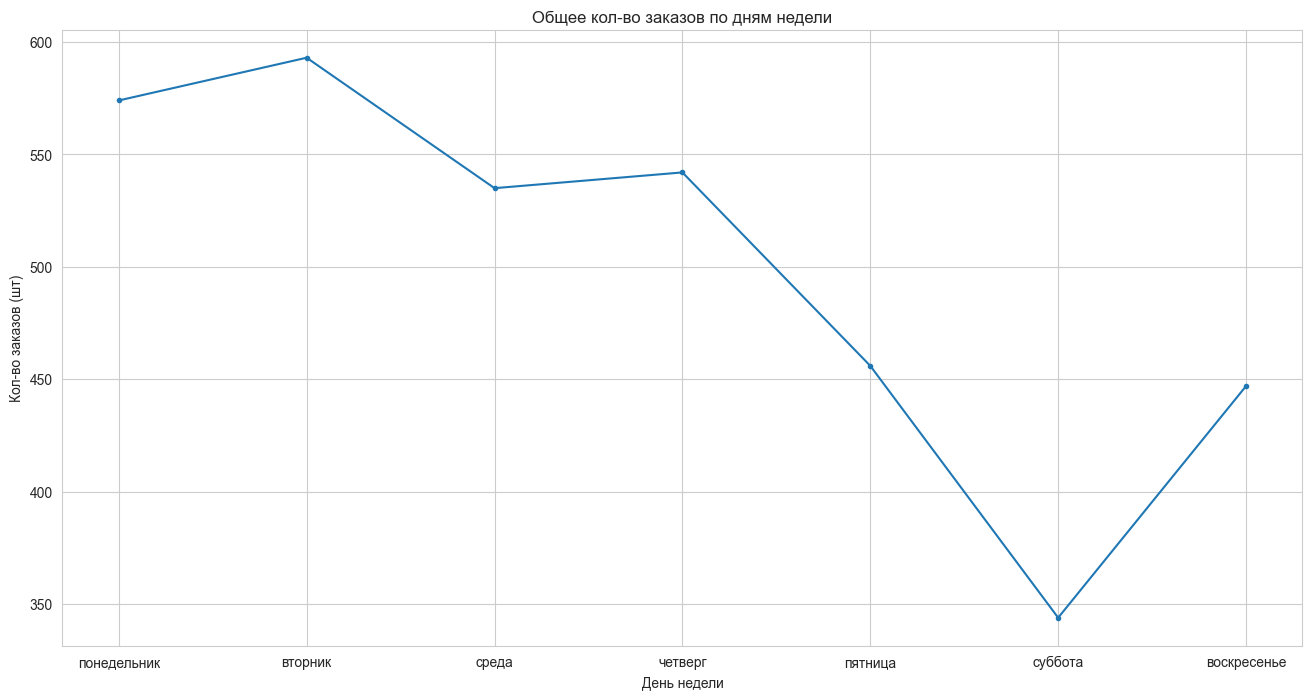

In [44]:
# Формируем сводную таблицу с кол-вом заказов по дням недели
total_orders_by_weekday = data.groupby('weekday').agg({'order_id': 'nunique'})
total_orders_by_weekday.index = ['понедельник', 'вторник', 'среда', 'четверг', 'пятница', 'суббота', 'воскресенье']
display(total_orders_by_weekday)

# Визуализируем данные
(total_orders_by_weekday.plot(style='.-', figsize=(16, 8), rot=0, legend=False,
                              title='Общее кол-во заказов по дням недели',
                              xlabel='День недели', ylabel='Кол-во заказов (шт)'));

При рассмотреннии датасета в целом пик заказов приходится на начало недели, после чего их количество постепенно снижается вплоть до самого низкого значения в субботу, а в воскресенье вновь начинает расти. Теперь посмотрим на эти значения в динамике.

понедельник  вторник  среда  четверг  пятница  суббота  воскресенье
month                                                                       
2018-10           42       50     39       30       31       21           24
2018-11           30       35     28       24       32       27           26
2018-12           55       46     40       39       42       19           36
2019-01           30       21     36       24       14       17           22
2019-02           57       49     48       48       32       22           33
2019-03           39       41     32       28       38       27           38
2019-04           52       46     41       40       37       22           28
2019-05           35       32     20       37       21       10           24
2019-06           29       37     24       24       13       10           19
2019-07           39       36     31       30       25       15           23
2019-08           27       24     21       35       22       20           23
2019-09           23       33     23       31       20       19           29
2019-10           20       31     47       32       24       19           25
2019-11           34       26     23       33       46       29           26
2019-12           34       54     33       39       23       31           32
2020-01           28       32     50       48       36       36           39

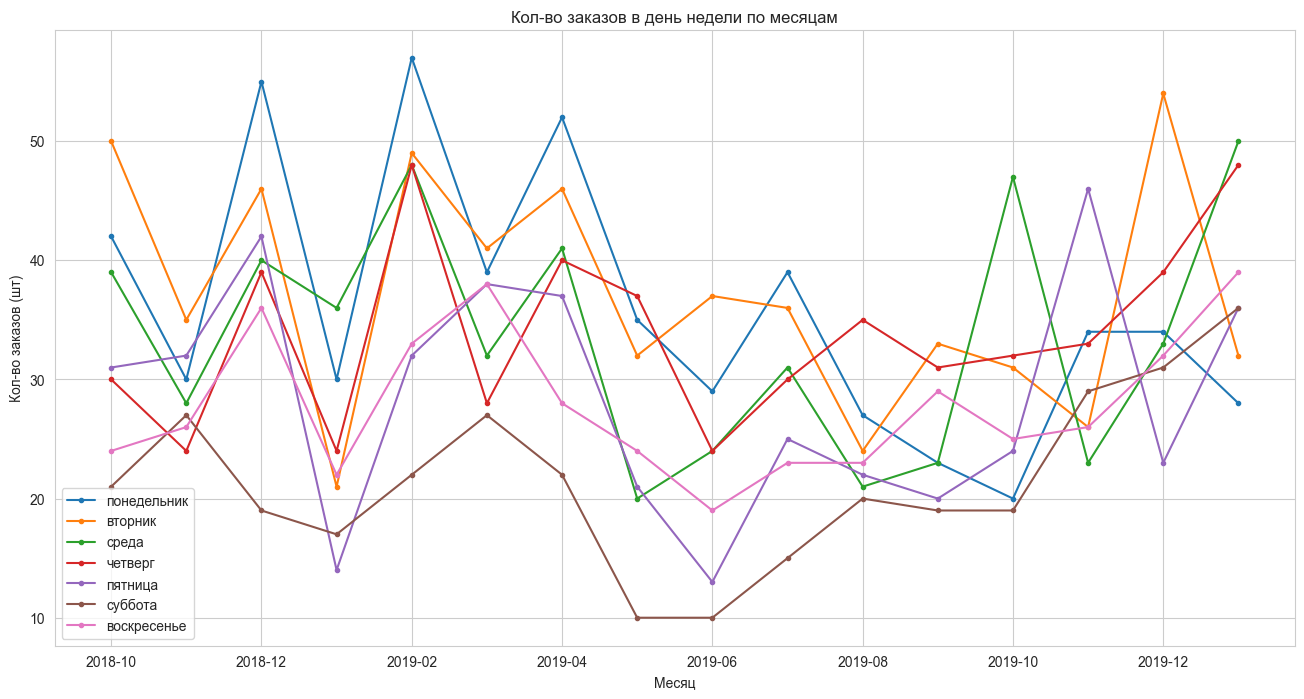

In [45]:
# Формируем сводную таблицу с кол-вом уникальных заказов в каждый день недели по месяцам, переименовываем столбцы
orders_by_weekday = data.pivot_table(index='month', columns='weekday', values='order_id', aggfunc='nunique')
orders_by_weekday.columns = ['понедельник', 'вторник', 'среда', 'четверг', 'пятница', 'суббота', 'воскресенье']
display(orders_by_weekday)

# Визуализируем данные
(orders_by_weekday.plot(style='.-', figsize=(16, 8), rot=0, 
                        title='Кол-во заказов в день недели по месяцам',
                        xlabel='Месяц', ylabel='Кол-во заказов (шт)'));

Можно отметить, что понедельник и вторник в основном лидировали, а суббота была на последнем месте по количеству заказов, вплоть до августа 2019 года. После этого количество заказов в разные дни недели начинает существенно изменяться от месяца к месяцу.

Дополнительно изучим количество товаров в заказах в разные дни недели.

понедельник  вторник  среда  четверг  пятница  суббота  воскресенье
month                                                                       
2018-10          155      287    247      150      192       62           68
2018-11          120      156    102      260      113      119           62
2018-12          157      104     96       61      120       24          144
2019-01           47      128    101       51       75       59           49
2019-02          250      109    138      213       77       56           72
2019-03          199      113     80      130      183       56          157
2019-04          317      278    279      150      208       77          138
2019-05          195      209    120      301      139       42          169
2019-06          132      150     91       90       43       19           62
2019-07          113      106     68       71       97       50           56
2019-08           79       59     47       76       45       26           35
2019-09           84       71     26       82       26       69           63
2019-10           22      139    121       49       60       45           71
2019-11           39       29     23       35       50       32           28
2019-12           40       59     34       42       24       32           34
2020-01           34       38     54       55       38       39           43

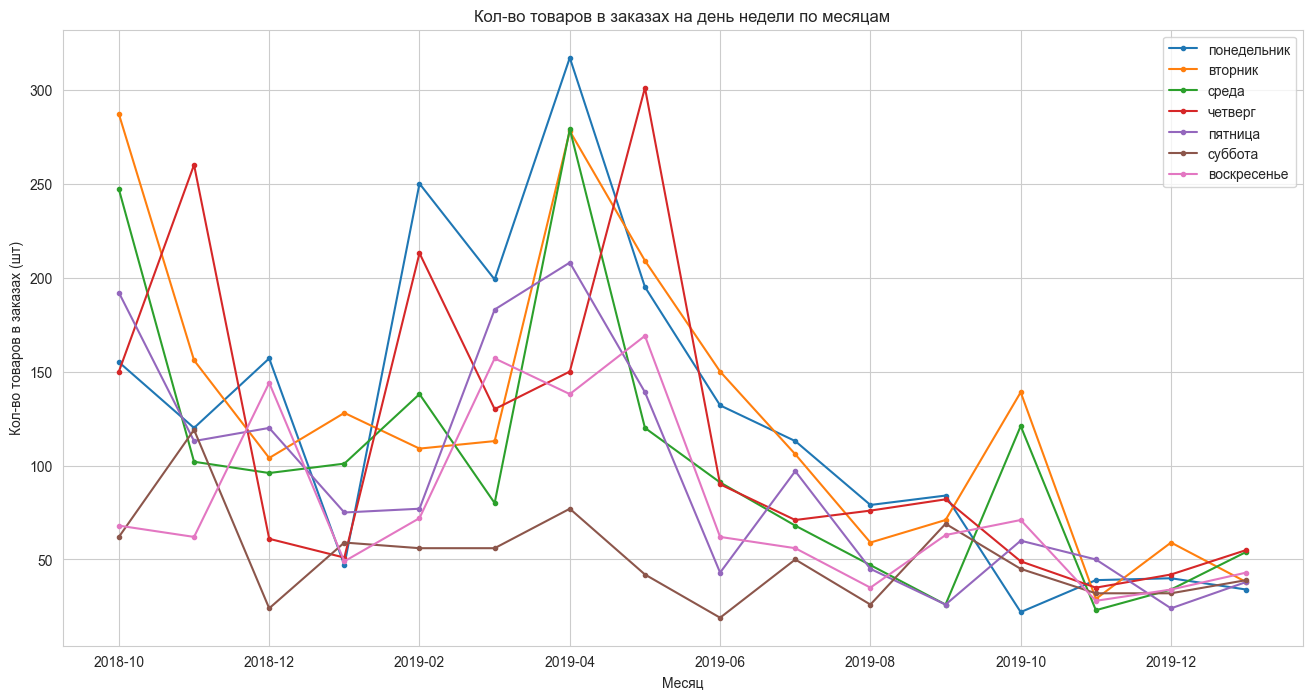

In [46]:
# Формируем сводную таблицу с кол-вом товара в заказах в каждый день недели, переименовываем столбцы
quantity_by_weekday = data.pivot_table(index='month', columns='weekday', values='quantity', aggfunc='sum')
quantity_by_weekday.columns = ['понедельник', 'вторник', 'среда', 'четверг', 'пятница', 'суббота', 'воскресенье']
display(quantity_by_weekday)

# Визуализируем данные
(quantity_by_weekday.plot(style='.-', figsize=(16, 8), rot=0, 
                          title='Кол-во товаров в заказах на день недели по месяцам',
                          xlabel='Месяц', ylabel='Кол-во товаров в заказах (шт)'));

Субботу по прежнему можно определить как день с наименьшими значениями, но лидерство понедельника и вторника не так явно выражено. Ранее мы уже выявили резкое снижение количества товаров в заказах в последние три месяца, потому их низкие значения в разбивке по дням недели были ожидаемы. 

### Количество заказов по часам

Изучим, как менялось количество заказов в зависимости от времени. 

order_id
time           
00:00        60
01:00        31
02:00        22
03:00        10
04:00        19
05:00        22
06:00        33
07:00        73
08:00       147
09:00       206
10:00       261
11:00       290
12:00       275
13:00       268
14:00       253
15:00       249
16:00       202
17:00       187
18:00       160
19:00       165
20:00       148
21:00       171
22:00       141
23:00       106

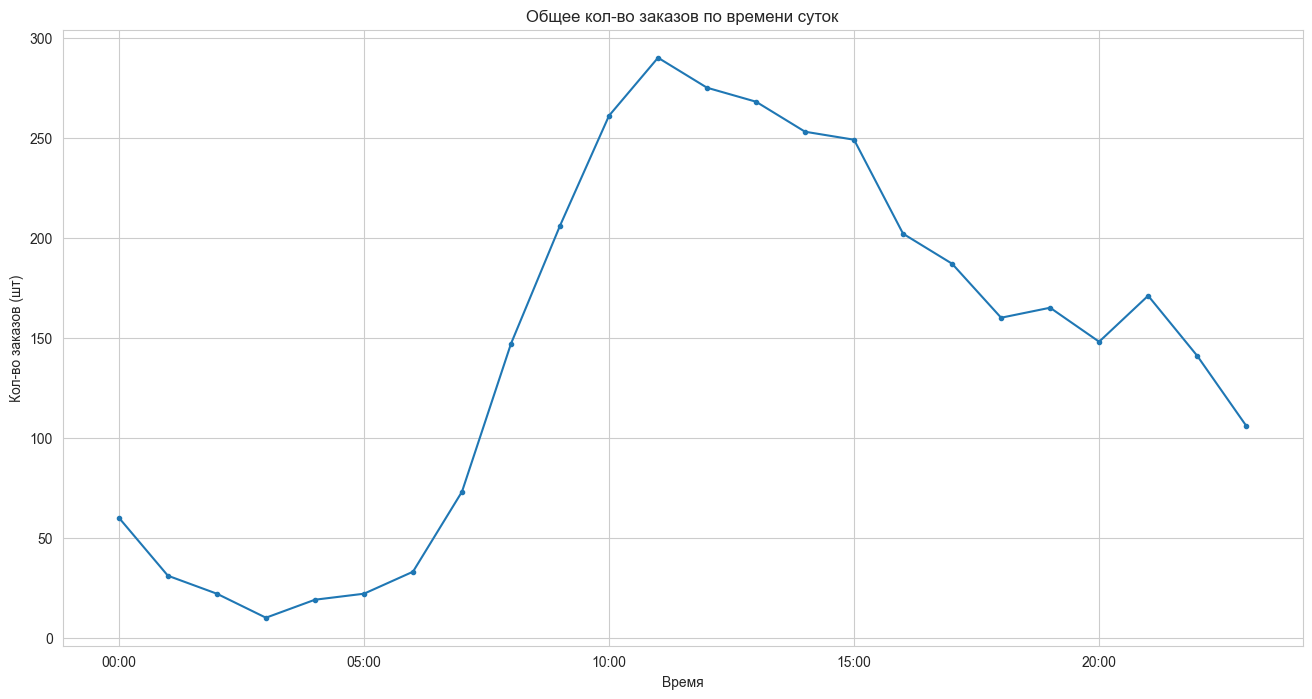

In [47]:
# Формируем сводную таблицу с кол-вом заказов по времени суток
total_orders_by_time = data.groupby('time').agg({'order_id': 'nunique'})
display(total_orders_by_time)

# Визуализируем данные
(total_orders_by_time.plot(style='.-', figsize=(16, 8), rot=0, legend=False,
                           title='Общее кол-во заказов по времени суток',
                           xlabel='Время', ylabel='Кол-во заказов (шт)'));

Видно, что пиковые часы магазина приходятся на промежуток с 10:00 до 15:00, при этом количество заказов очень быстро растет по утрам, начиная с 7:00. В дневное-вечернее время количество заказов равномерно снижается вплоть до небольшого роста между 20 и 21:00, после чего достаточно быстро падает до минимальных значений в ночные часы (00:00 до 06:00).

### Промежуточные выводы

В ходе анализа данных было выявлено следующее: 

1. За рассматриваемый промежуток времени (октябрь 2018 - январь 2020) ежемесячная выручка магазина *снизилась почти в 2 раза* (174 тысячи в январе 2020 против 338 тысяч в октябре 2018).
2. Количество уникальных заказов растет последние 5 месяцев после падения в середине 2019, но все еще уступает пиковым значениям декабря 2018 и февраля 2019 года. Важным наблюдением является то, что последние три месяца все покупатели магазина *совершили только по одному заказу*.
3. Помимо этого, в последние три месяца *полностью исчезли* заказы с количеством товара больше двух. Это и послужило основной причиной падения выручки.
4. Медианные цены на товары в разрезе категорий оставались *стабильными* весь наблюдаемый период, исключение - категория "сумки и тележки" с высокими ценами и малым количеством проданных товаров.
5. Показатели групп товаров:
 - Лидирующие по *выручке* группы товаров - "хозяйственные товары" (47.41%) и "сумки и тележки" (21.72%), замыкающая - "муляжи и искуственные цветы" (2.08%).
 - Лидирующие по *количеству проданных единиц товара* группы - "растения, семена и рассада" (37.12%) и "хозяйственные товары" (27.55%), замыкающая - "муляжи и искуственные цветы" (4.04%).
 - Таким образом, группе "хозяйственные товары" стоит уделить особое внимание, как выделяющейся и по выручке, и по объему.
6. Пиковые дни недели по количеству заказов - *понедельник и вторник*, после чего количество постепенно снижается вплоть до самого низкого значения в *субботу*, а в воскресенье вновь начинает расти.
7. Пиковые часы по количество заказов - промежуток *с 10:00 до 15:00*, при этом количество заказов очень быстро растет по утрам, начиная с 7:00. Минимальные значения - в ночные часы *(00:00 до 06:00)*.

## Составление профилей пользователей

### RFM-анализ. Первичная сегментация пользователей

Перейдем к составлению профилей пользователей с помощью RFM-анализа. Подготовим данные для работы.

In [48]:
# Оставляем из исходных данных только те столбцы, которые нужны для RFM-анализа
rfm_data = data[['date', 'customer_id', 'order_id', 'total']]
# Приводим столбец date в формат даты
rfm_data['date'] = rfm_data['date'].astype('datetime64')

# Проверяем результат
rfm_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5527 entries, 0 to 5526
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   date         5527 non-null   datetime64[ns]
 1   customer_id  5527 non-null   object        
 2   order_id     5527 non-null   int64         
 3   total        5527 non-null   float64       
dtypes: datetime64[ns](1), float64(1), int64(1), object(1)
memory usage: 172.8+ KB


Данные подготовлены, перейдем к расчетам. Нас интересуют следующие значения:
- Recency - как давно покупатель сделал последний заказ (за точку отсчета возьмем последний день, представленный в данных, то есть 31.01.2020)
- Frequency - количество заказов, сделанных покупателем
- Monetary value - общая стоимость всех заказов клиента

In [49]:
# Формируем сводную таблицу
rfm_table = (rfm_data.groupby('customer_id').agg({'date': lambda x: (dt.datetime(2020,1,31) - x.max()).days,
                                                 'order_id': lambda x: len(x.unique()),
                                                 'total': lambda x: x.sum()})
                                            .reset_index())
# Переименовываем столбцы
rfm_table = rfm_table.rename(columns={'date': 'recency',
                                      'order_id': 'frequency',
                                      'total': 'monetary_value'})
# Проверяем результат
rfm_table.head(10)

customer_id  recency  frequency  monetary_value
0  000d6849-084e-4d9f-ac03-37174eaf60c4      107          1           555.0
1  001cee7f-0b29-4716-b202-0042213ab038      349          1           442.0
2  00299f34-5385-4d13-9aea-c80b81658e1b      109          1           914.0
3  002d4d3a-4a59-406b-86ec-c3314357e498      369          1          1649.0
4  003bbd39-0000-41ff-b7f9-2ddaec152037      124          1          2324.0
5  004d24e9-4a6c-4d0e-8727-8391dfd4b43a      369          1          1536.0
6  005ba170-45e8-42de-93f7-192481ae2659       87          2          7857.0
7  00bd74b1-2792-47db-a2f1-680a09ac5026      467          1           937.0
8  00c0f92a-121a-4883-a78d-2c7b5fe187de       50          2           321.0
9  00c95d20-923e-4b45-88fc-53b12931d462       43          1           186.5

Рассчитаем квантили для полученных значений RFM.

In [50]:
quantiles = rfm_table.quantile(q=[0.25,0.5,0.75])
quantiles

recency  frequency  monetary_value
0.25     72.0        1.0           389.0
0.50    206.0        1.0           830.0
0.75    343.0        2.0          1784.0

Видно, что из-за того, что в данных преобладают пользователи с одним заказом, значения 25-го и 50-го квантиля у frequency совпадают.

Создадим новый датафрейм для записи значений сегментов, и функции для их определения.

In [51]:
# Для дальнейшей работы преобразуем значения квантилей в словарь
quantiles = quantiles.to_dict()

# Копированием создаем новый датафрейм
rfm_segments = rfm_table.copy()

# Функция для определения сегмента recency (чем ниже значение, тем лучше)
def r_quartile(value, r, quartiles):
    if value <= quartiles[r][0.25]:
        return 4
    elif value <= quartiles[r][0.50]:
        return 3
    elif value <= quartiles[r][0.75]:
        return 2
    else:
        return 1
    
# Функция для определения сегментов frequency и monetary_value (чем выше значение, тем лучше)
def fm_quartile(value, fm, quartiles):
    if value <= quartiles[fm][0.25]:
        return 1
    elif value <= quartiles[fm][0.50]:
        return 2
    elif value <= quartiles[fm][0.75]:
        return 3
    else:
        return 4

Все готово для сегментации пользователей.

In [52]:
# Выводим значения сегментов RFM для каждого пользователя
rfm_segments['r_quartile'] = rfm_segments['recency'].apply(r_quartile, args=('recency', quantiles))
rfm_segments['f_quartile'] = rfm_segments['frequency'].apply(fm_quartile, args=('frequency', quantiles))
rfm_segments['m_quartile'] = rfm_segments['monetary_value'].apply(fm_quartile, args=('monetary_value', quantiles))

# И общую группу на основе всех значений
rfm_segments['rfm_class'] = (rfm_segments['r_quartile'].map(str) + 
                             rfm_segments['f_quartile'].map(str) + 
                             rfm_segments['m_quartile'].map(str)).astype('int')

# Проверяем результат
rfm_segments.head(10)

customer_id  recency  frequency  monetary_value  \
0  000d6849-084e-4d9f-ac03-37174eaf60c4      107          1           555.0   
1  001cee7f-0b29-4716-b202-0042213ab038      349          1           442.0   
2  00299f34-5385-4d13-9aea-c80b81658e1b      109          1           914.0   
3  002d4d3a-4a59-406b-86ec-c3314357e498      369          1          1649.0   
4  003bbd39-0000-41ff-b7f9-2ddaec152037      124          1          2324.0   
5  004d24e9-4a6c-4d0e-8727-8391dfd4b43a      369          1          1536.0   
6  005ba170-45e8-42de-93f7-192481ae2659       87          2          7857.0   
7  00bd74b1-2792-47db-a2f1-680a09ac5026      467          1           937.0   
8  00c0f92a-121a-4883-a78d-2c7b5fe187de       50          2           321.0   
9  00c95d20-923e-4b45-88fc-53b12931d462       43          1           186.5   

   r_quartile  f_quartile  m_quartile  rfm_class  
0           3           1           2        312  
1           1           1           2        112  
2           3           1           3        313  
3           1           1           3        113  
4           3           1           4        314  
5           1           1           3        113  
6           3           3           4        334  
7           1           1           3        113  
8           4           3           1        431  
9           4           1           1        411

### RFM-анализ. Укрупнение групп пользователей

Первичная сегментация проведена, посмотрим, как клиенты распределились по сегментам.

In [53]:
# Выводим значения групп и кол-во попавших в них клиентов
print(f'Количество уникальных RFM-групп: {rfm_segments["rfm_class"].nunique()}')
rfm_segments.pivot_table(index='rfm_class', values='customer_id', aggfunc='count')

Количество уникальных RFM-групп: 42


customer_id
rfm_class             
111                150
112                143
113                142
114                125
131                  6
132                  9
133                  5
134                 12
142                  1
143                  1
144                  4
211                155
212                147
213                126
214                100
231                  8
232                 15
233                 12
234                 22
242                  3
243                  4
244                  8
311                148
312                109
313                 96
314                 68
331                 27
332                 36
333                 49
334                 57
341                  1
342                  1
343                  1
344                  4
411                  8
412                  2
413                  1
414                  4
431                 99
432                131
433                162
434                195

Видно, что мы получили достаточно большое количество групп маленького размера, иногда всего в 1 клиента. Перед дальнейшим анализом имеет смысл объединить часть групп между собой или с более крупными.

Такая неравномерная сегментация, скорее всего, произошла из-за преобладания в данных пользователей, совершивших лишь один заказ. Подтвердим это, сгруппировав данные по каждой из составляющих RFM.

In [54]:
# Выводим значения сегментов RFM и кол-во попавших в них клиентов
display(rfm_segments.pivot_table(index='r_quartile', values='customer_id', aggfunc='count'))
display(rfm_segments.pivot_table(index='f_quartile', values='customer_id', aggfunc='count'))
display(rfm_segments.pivot_table(index='m_quartile', values='customer_id', aggfunc='count'))

customer_id
r_quartile             
1                   598
2                   600
3                   597
4                   602

customer_id
f_quartile             
1                  1524
3                   845
4                    28

customer_id
m_quartile             
1                   602
2                   597
3                   599
4                   599

Предположение подтвердилось - данные по Recency и Monetary value распределены по сегментам равномерно, тогда как по Frequency - нет.

Объединим 3 и 4 сегменты Frequency в 4, в котором будут все пользователи, совершившие больше одного заказа. В связи с тем, что в последние три месяца все клиенты магазина совершали по одному заказу, присвоение сегмента 4 тем, кто до этого совершал хотя бы два, оправданно.

In [55]:
# Присваиваем всем записям со значнием сегмента 3 значение сегмента 4
rfm_segments.loc[rfm_segments['f_quartile'] == 3, 'f_quartile'] = 4

# Обновляем RFM-группы
rfm_segments['rfm_class'] = (rfm_segments['r_quartile'].map(str) + 
                             rfm_segments['f_quartile'].map(str) + 
                             rfm_segments['m_quartile'].map(str)).astype('int')

# Выводим значения групп и кол-во попавших в них клиентов
print(f'Количество уникальных RFM-групп: {rfm_segments["rfm_class"].nunique()}')
rfm_segments.pivot_table(index='rfm_class', values='customer_id', aggfunc='count')

Количество уникальных RFM-групп: 32


customer_id
rfm_class             
111                150
112                143
113                142
114                125
141                  6
142                 10
143                  6
144                 16
211                155
212                147
213                126
214                100
241                  8
242                 18
243                 16
244                 30
311                148
312                109
313                 96
314                 68
341                 28
342                 37
343                 50
344                 61
411                  8
412                  2
413                  1
414                  4
441                 99
442                131
443                162
444                195

Количество групп сократилось с 42 до 32, хотя часть групп по прежнему имеет небольшое количество клиентов.

Добавим данные о группе RFM в основной датафрейм для дальнейшего анализа.

In [56]:
# Добавляем столбец с данными о группе RFM в основной датафрейм
data = data.merge(rfm_segments[['customer_id', 'rfm_class']], on='customer_id')
data.head()

date   time                           customer_id  order_id  \
0  2018-10-01  00:00  ee47d746-6d2f-4d3c-9622-c31412542920     68477   
1  2018-10-01  00:00  ee47d746-6d2f-4d3c-9622-c31412542920     68477   
2  2018-10-01  00:00  ee47d746-6d2f-4d3c-9622-c31412542920     68477   
3  2018-10-01  00:00  ee47d746-6d2f-4d3c-9622-c31412542920     68477   
4  2018-10-01  00:00  ee47d746-6d2f-4d3c-9622-c31412542920     68477   

                     category  \
0  растения, семена и рассада   
1  растения, семена и рассада   
2  растения, семена и рассада   
3  растения, семена и рассада   
4  растения, семена и рассада   

                                              product  quantity  price  total  \
0     комнатное растение в горшке алое вера, d12, h30         1  142.0  142.0   
1  комнатное растение в горшке кофе арабика, d12, h25         1  194.0  194.0   
2                         радермахера d-12 см h-20 см         1  112.0  112.0   
3                    хризолидокарпус лутесценс d-9 см         1  179.0  179.0   
4                      циперус зумула d-12 см h-25 см         1  112.0  112.0   

     month  weekday  rfm_class  
0  2018-10        0        113  
1  2018-10        0        113  
2  2018-10        0        113  
3  2018-10        0        113  
4  2018-10        0        113

### Анализ RFM-групп пользователей

#### Выбор групп для анализа

Изучим наиболее интересные группы клиентов. За таковые будем считать группы, которые удовлеворяют двум критериям:
- Значение хотя бы двух сегментов RFM равно 4
- Значения сегментов Recency и Monetary value больше 1

Группы, удовлетворяющие такому условию, можно попарно объединить:
- Группы 414 и 444 - клиенты, купившие в магазине товаров на большие суммы, и делавшие заказы относительно недавно
- Группы 442 и 443 - клиенты, купившие в магазине товаров на средние суммы, и делавшие заказы относительно недавно
- Группы 244 и 344 - клиенты, купившие в магазине товаров на большие суммы, сделавшие много заказов, но относительно давно ничего не покупавшие

Выделим данные об этих группах в отдельный датафрейм, чтобы с ними было удобнее работать.

In [57]:
# Создаем список с номерами выбранных групп
selected_groups = [414, 444, 442, 443, 244, 344]

# Фильтруем данные по списку
rfm_study_data = data.query('rfm_class in @selected_groups').reset_index(drop=True)

# Посмотрим на размеры выбранных групп
rfm_study_data.pivot_table(index='rfm_class', values='customer_id', aggfunc='nunique')

customer_id
rfm_class             
244                 30
344                 61
414                  4
442                131
443                162
444                195

Группа 414 оказалась очень маленькой, что ожидаемо - это пользователи, сделавшие один заказ недавно и на крупную сумму. В рамках анализа мы будем рассматривать группы попарно, потому это не является проблемой.

Группы 244 и 344 также содержат не очень большое число пользователей Это бывшие лояльные клиенты, которые по каким-то причинам давно не делали заказов, потому их изучение оправданно.

Поскольку изучения групп мы будем использовать однотипные визуализации и расчеты, имеет смысл создать для этого собственные функции.

In [58]:
# Функция для постройки графиков, принимает датафрейм и список групп, возвращает сводную таблицу и круговые диаграммы
def groups_category_charts(df, groups):
    # Отбираем интересующие нас группы
    rfm_groups = data.query('rfm_class in @groups')

    # Формируем сводную таблицу с выручкой
    revenue_groups = (rfm_groups.pivot_table(index='category', values='total', aggfunc='sum')
                          .round(2)
                          .rename(columns={'total': 'revenue'})
                          .sort_values(by='revenue', ascending=False))

    # Формируем сводную таблицу с количеством проданных единиц товара
    items_groups = (rfm_groups.pivot_table(index='category', values='quantity', aggfunc='sum')
                        .sort_values(by='quantity', ascending=False))

    # Объединяем таблицы в одну
    category_data_groups = revenue_groups.merge(items_groups, on='category')
    display(category_data_groups)

    # Визуализируем данные
    plt.figure(figsize=(16, 14))

    # Круговая диаграмма для выручки
    category_data_groups.plot(kind='pie', y='revenue', ax=plt.subplot(2, 1, 1), autopct='%1.2f%%', legend=False)
    plt.title(f'Распределение выручки по категориям для групп {groups}')
    plt.xlabel('Доля от общей выручки групп (%)')
    plt.ylabel('')

    # Круговая диаграмма для количества проданных товаров
    category_data_groups.plot(kind='pie', y='quantity', ax=plt.subplot(2, 1, 2), autopct='%1.2f%%', legend=False)
    plt.title(f'Распределение проданных единиц товара по категориям для групп {groups}')
    plt.xlabel('Доля от общего числа проданного товара групп (%)')
    plt.ylabel('')

    plt.tight_layout()
    plt.show()

In [59]:
# Функция принимает датафрейм и список групп, возвращает сводную таблицу с топ-20 товаров по количеству проданных единиц товара
def groups_top20_items(df, groups):
    # Отбираем интересующие нас группы
    rfm_groups = data.query('rfm_class in @groups')
    
    # Строим сводную таблицу с топ-20 товаров
    display(rfm_groups.pivot_table(index='product', values=['quantity', 'total'], aggfunc='sum')
                      .round(2)
                      .sort_values(by='quantity', ascending=False)
                      .head(20))

#### Группы 414 и 444 - самые ценные клиенты

В группах 414 и 444 представлены самые ценные клиенты магазина, потому начнем изучение с них.

Для начала посмотрим, какие категории товаров больше интересовали эти группы клиентов.

revenue  quantity
category                                             
хозяйственные товары              404320.00       214
сумки и тележки                   245722.50        70
посуда и кухонные принадлежности   32341.50        38
растения, семена и рассада         24353.33        79
одежда, белье и аксессуары         16152.00        14
муляжи и искуственные цветы          303.00         5

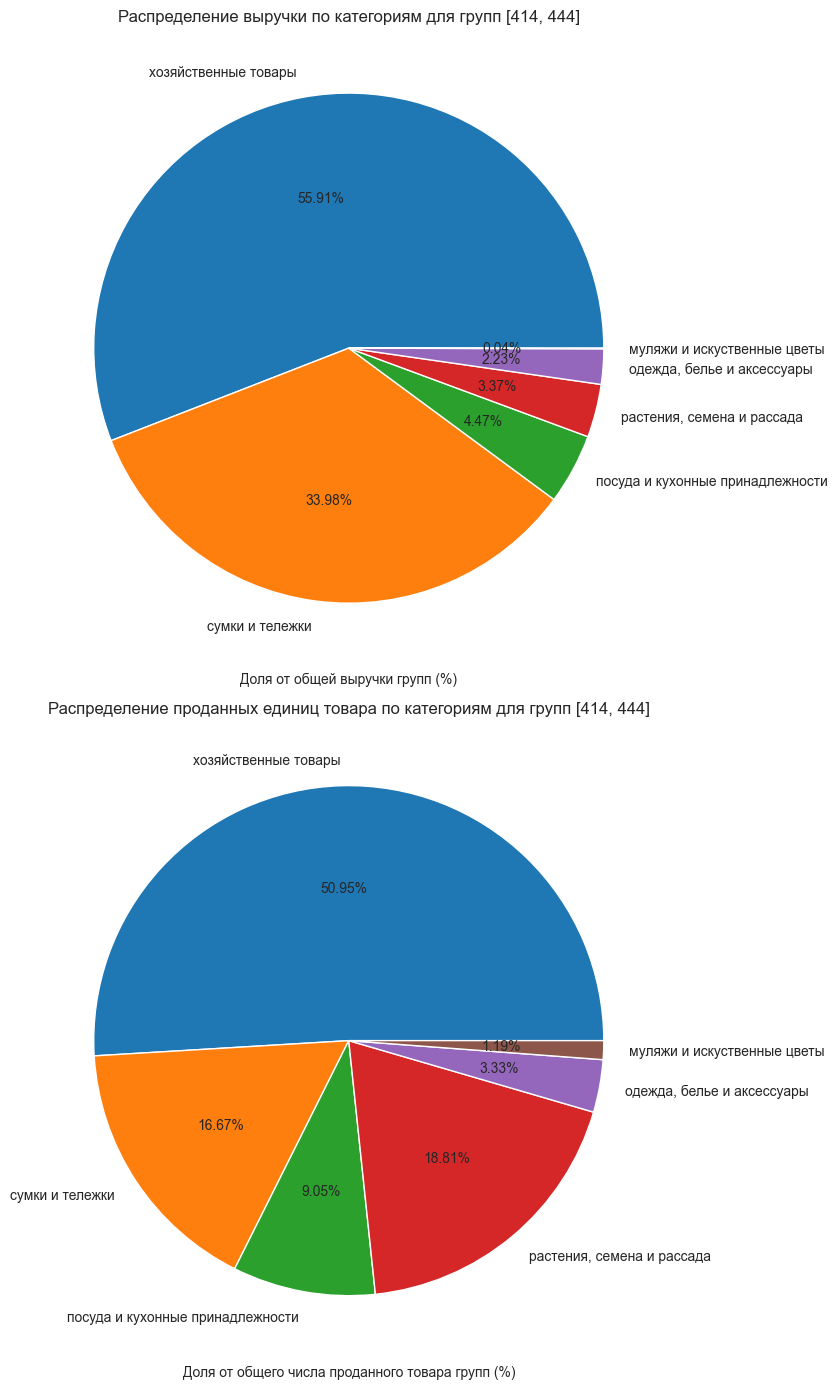

In [60]:
# Выводим сводную таблицу категорий и диаграммы
groups_category_charts(rfm_study_data, [414, 444])

Видно, что лидерство категории "хозяйственные товары", которе наблюдается в датасете в целом, для этих групп выражено еще более явно - на нее приходится более половины выручки и единиц проданного товара. Можно отметить существенное увеличение доли категории "сумки и тележки" в объеме продаж - 16.67% против 4.04% для всего датасета.

Посмотрим на самые часто заказываемые товары.

In [61]:
# Выводим топ-20 товаров
groups_top20_items(rfm_study_data, [414, 444])

quantity  \
product                                                                                                        
сушилка meliconi stendy junior                                                                             4   
сумка-тележка хозяйственная gimi easy go синяя                                                             4   
сумка-тележка 2-х колесная gimi galaxy красная                                                             4   
гладильная доска ника blues 124х46 см 5757                                                                 4   
полки qwerty рио белый/чёрный 42,5х21х10 см 17х17х10 см 17х17х10 см 72005                                  4   
сумка-тележка 2-х колесная складная gimi flexi зеленая                                                     4   
сушилка для белья gimi mito алюминий                                                                       3   
сушилка для белья настенная складная алюминиевая telegant 100 103,5х53,5 см белая, leifheit, 83305         3   
гладильная доска sarayli new elegant 125x45 см                                                             3   
сумка-тележка хозяйственная andersen scala shopper, elba, бирюзовая 112-051-90                             3   
сумка-тележка хозяйственная rolser paris, бордовая, pep001 bassi joy                                       3   
таз пластмассовый строительный прямоугольный 80 л, 1404085                                                 3   
гладильная доска ника lora fashion hlf 123х46 см                                                           3   
сумка-тележка 2-х колесная gimi galaxy черная                                                              3   
сумка-тележка хозяйственная andersen scala shopper, petit, черная 112-010-80                               3   
сумка-тележка хозяйственная rolser jet c. capri joy черная, jet017 negro joy                               3   
пеларгония розебудная red pandora укорененный черенок                                                      3   
пеларгония зональная ринго вайт d-7 см h-10 см укорененный черенок                                         3   
сумка-тележка хозяйственная rolser imx006 bassi logic tour бордовая                                        3   
сумка-тележка хозяйственная gimi market синяя                                                              3   

                                                                                                       total  
product                                                                                                       
сушилка meliconi stendy junior                                                                      22376.00  
сумка-тележка хозяйственная gimi easy go синяя                                                       6596.00  
сумка-тележка 2-х колесная gimi galaxy красная                                                      11096.00  
гладильная доска ника blues 124х46 см 5757                                                          10108.00  
полки qwerty рио белый/чёрный 42,5х21х10 см 17х17х10 см 17х17х10 см 72005                            7796.00  
сумка-тележка 2-х колесная складная gimi flexi зеленая                                               6596.00  
сушилка для белья gimi mito алюминий                                                                 5434.50  
сушилка для белья настенная складная алюминиевая telegant 100 103,5х53,5 см белая, leifheit, 83305  11247.00  
гладильная доска sarayli new elegant 125x45 см                                                       7647.00  
сумка-тележка хозяйственная andersen scala shopper, elba, бирюзовая 112-051-90                      11361.00  
сумка-тележка хозяйственная rolser paris, бордовая, pep001 bassi joy                                12351.00  
таз пластмассовый строительный прямоугольный 80 л, 1404085                                           1572.00  
гладильная доска ника lora fashion hlf 123х46 см                                 

Половину из 20 самых популярных позиций составляют сумки-тележки, еще 5 - сушилки и гладильные доски.

Таким образом, имеет смысл изучить, какие сопутствующие товары можно предожить для этих позиций. В ассортименте магазина уже представлено большое количество аксессуаров для глажки и сушки, подборка интересных предложений из этих товаров может быть одним из вариантов рассылки.

#### Группы 442 и 443 - лояльные клиенты

В этих группах представлены активные клиенты, которые покупают часто, но общая стоимость их покупок уступает пиковым значениям.

revenue  quantity
category                                             
хозяйственные товары              160044.83       247
сумки и тележки                    49462.75        53
растения, семена и рассада         36876.67       199
посуда и кухонные принадлежности   23158.50        59
одежда, белье и аксессуары         10934.00        29
муляжи и искуственные цветы         1335.00        24

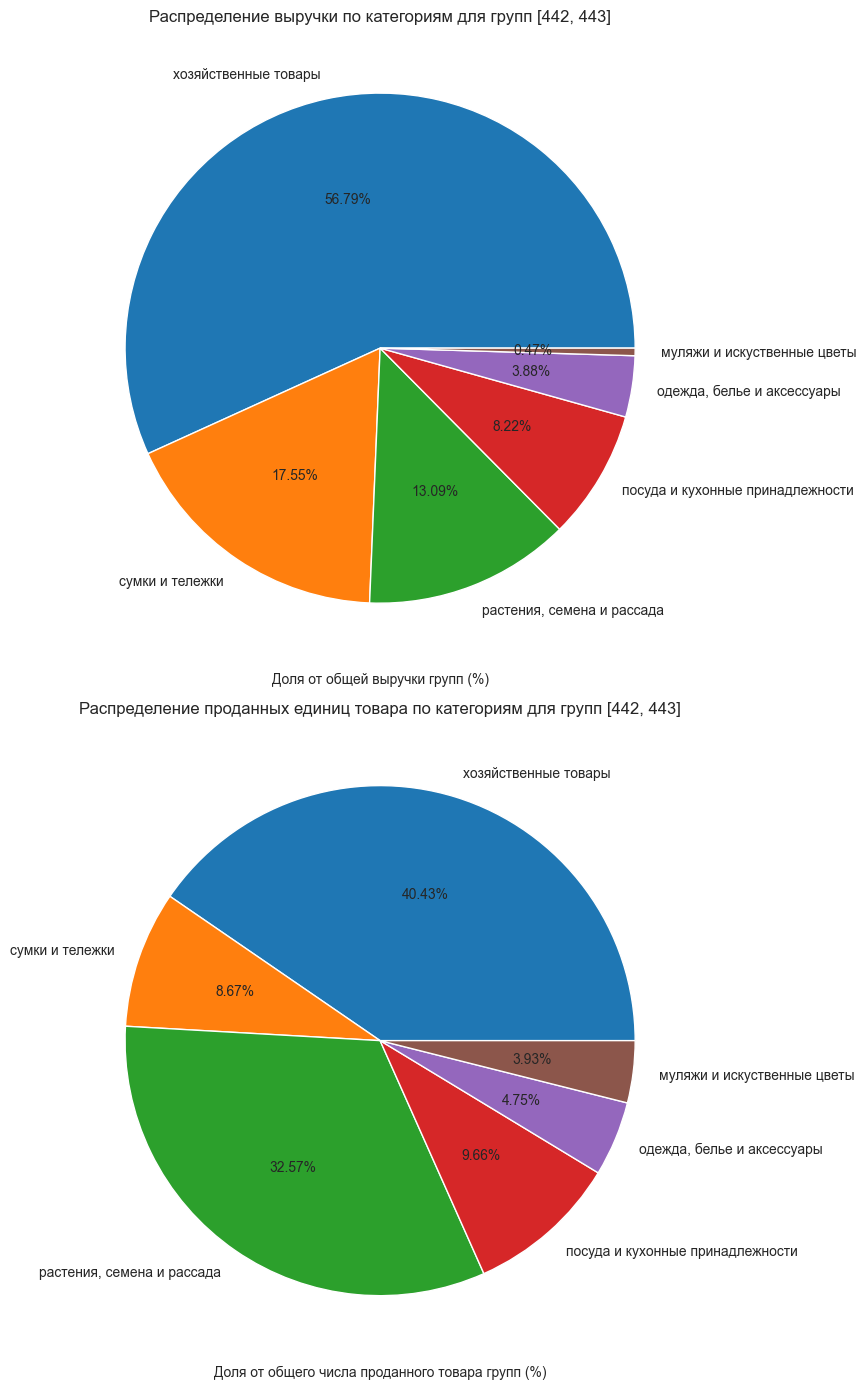

In [62]:
# Выводим сводную таблицу категорий и диаграммы
groups_category_charts(rfm_study_data, [442, 443])

Категория "хозяйственные товары" по прежнему лидирует по выручке, и ее доля даже несколько выше, чем для групп 414 и 444, однако диаграмма для количества проданных товаров существенно изменилась - покупатели из групп 442 и 443 приобретали много товаров из категории "растения, семена и рассада" (32.57%). Доля этой категории в выручке (13.09%) также стала более существенной.

In [63]:
# Выводим топ-20 товаров
groups_top20_items(rfm_study_data, [442, 443])

quantity  \
product                                                                                                     
тележка багажная delta тбр-20 синий грузоподъемность 25 кг сумка и 50 кг каркас россия                 12   
тележка багажная delta dt-22 синий грузоподъемность 20 кг сумка и 50 кг каркас россия                   6   
тележка багажная delta тбр-21 черный грузоподъемность 25 кг для сумка и 50 кг для каркас россия         6   
сушилка для белья потолочная лиана 1,7 м 1703006                                                        6   
сушилка для белья потолочная zalger lift basic 1520 200 см 10 м                                         5   
сушилка для белья потолочная лиана 2,0 м 1703009                                                        5   
пеларгония розебудная prins nikolai укорененный черенок                                                 4   
корзина для белья виолет с крышкой ротанг 60 л белая 1860/06                                            4   
новогоднее дерево ель канадская коника в декоративном контейнере 1 л h-20 см                            4   
скатерть dasch донна роза из пвх 0401-2 розы круглая 152 см 5974                                        4   
роза садовая чайногибридная в горшке керио                                                              4   
афеляндра скуарроса дания d-12 см                                                                       3   
сумка-тележка хозяйственная gimi easy go красная                                                        3   
герань домашняя (пеларгония зональная) цветущая d12, h25-30, лососевая, махровая                        3   
зверобой продырявленный оптимист d- 12-13 см                                                            3   
таз пластмассовый 30,0 л овальный пц2913, 1404051                                                       3   
овощеварка алюминиевая scovo мт-045, хозлэнд, 1502079                                                   3   
штанга для ванной г-образная, угловая 80х170 см, хром                                                   3   
чехол для гладильной доски attribute metal 140х60 см abm106                                             3   
окномойка с алюминиевой телескопической ручкой со съемной насадкой 57373 1804049                        3   

                                                                                                   total  
product                                                                                                   
тележка багажная delta тбр-20 синий грузоподъемность 25 кг сумка и 50 кг каркас россия           8759.75  
тележка багажная delta dt-22 синий грузоподъемность 20 кг сумка и 50 кг каркас россия            3446.00  
тележка багажная delta тбр-21 черный грузоподъемность 25 кг для сумка и 50 кг для каркас россия  4509.00  
сушилка для белья потолочная лиана 1,7 м 1703006                                                 3372.00  
сушилка для белья потолочная zalger lift basic 1520 200 см 10 м                                  3070.00  
сушилка для белья потолочная лиана 2,0 м 1703009                                                 2995.00  
пеларгония розебудная prins nikolai укорененный черенок                                           536.50  
корзина для белья виолет с крышкой ротанг 60 л белая 1860/06                                     2368.00  
новогоднее дерево ель канадская коника в декоративном контейнере 1 л h-20 см                     1856.00  
скатерть dasch донна роза из пвх 0401-2 розы круглая 152 см 5974                                 1768.00  
роза садовая чайногибридная в горшке керио                                                        750.00  
афеляндра скуарроса дания d-12 см                                                                1641.00  
сумка-тележка хозяйственная gimi easy go красная                                                 3150.00  
герань домашняя (пеларгония зональная) цветущая d12, h25-30, лососевая, махровая             

В топ-20 товаров вновь представлены сумки-тележки и сушилки для белья. Помимо этого, тут пристуствуют несколько позиций растений и цветов. 

Высокая доля категории "растения, семена и рассада" в объеме продаж говорит о том, что клиентам из этой категории могут быть интересны сопутствующие товары, связанные с ней - например, удобрения или садовый инвентарь.

#### Группы 244 и 344 - бывшие лояльные клиенты

В этих группах представлены клиенты с большой общей суммой покупок, которые раньше совершали много заказов, но в последнее время перестали это делать. Стоит помнить, что количество пользователей в этой паре групп меньше, чем в других.

revenue  quantity
category                                             
хозяйственные товары              274751.67       454
сумки и тележки                   160942.00        58
растения, семена и рассада         65643.00       547
одежда, белье и аксессуары         48962.00        33
посуда и кухонные принадлежности   10430.00        50
муляжи и искуственные цветы         4879.67        85

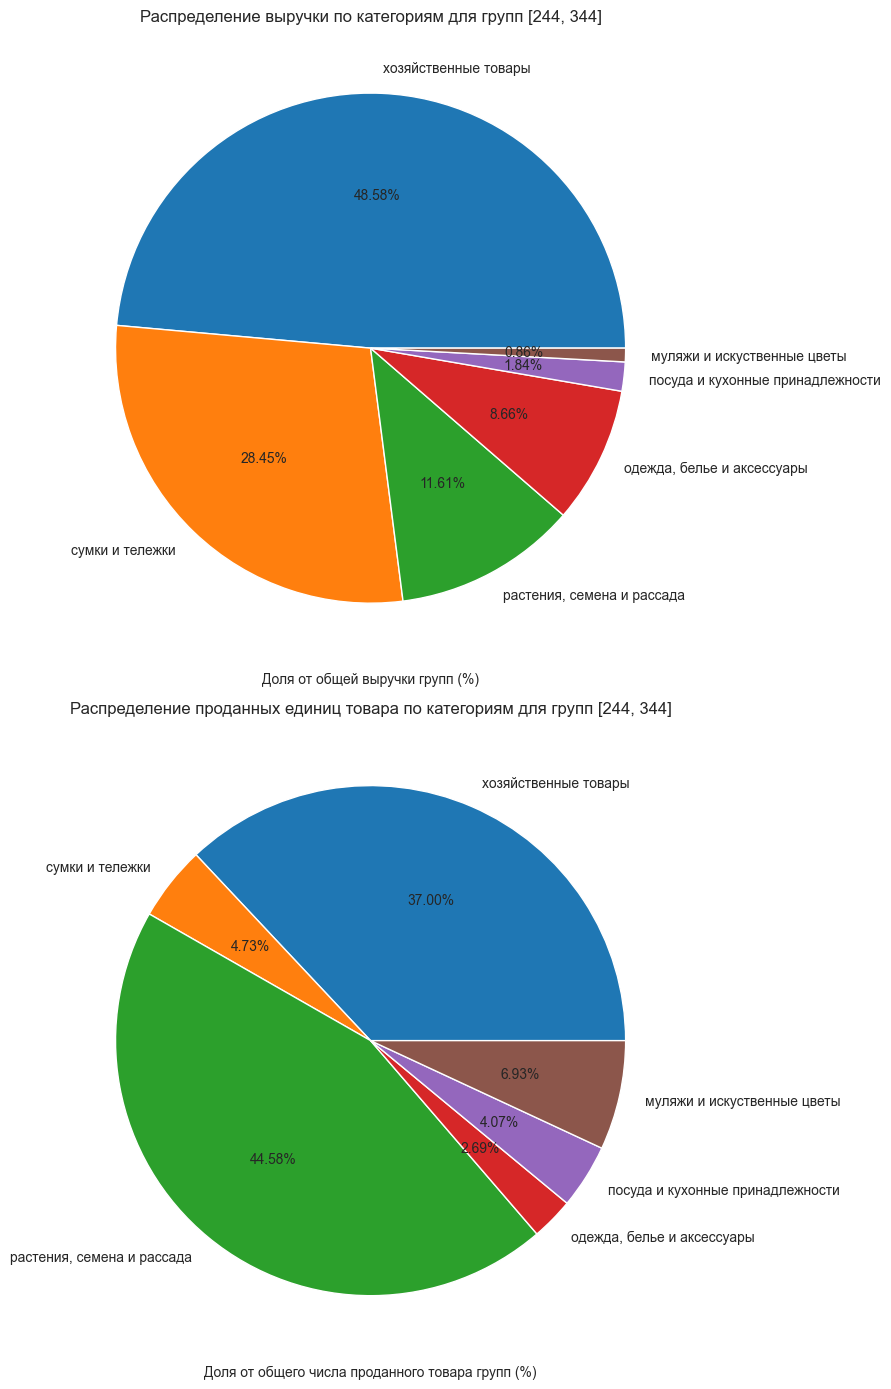

In [64]:
# Выводим сводную таблицу категорий и диаграммы
groups_category_charts(rfm_study_data, [244, 344])

На первой диаграмме вновь наблюдаем лидерство категории "хозяйственные товары", но ее доля уменьшилась, а доля категории "сумки и тележки" - напротив, существенно выросла. Вторая диаграмма значительно изменилась - для этих групп категория "растения, семена и рассада" составляет большую часть объема (44.58%).

In [65]:
# Выводим топ-20 товаров
groups_top20_items(rfm_study_data, [244, 344])

quantity  \
product                                                                                                                             
салфетка protec textil polyline 30х43 см аметист белая 6230                                                                    64   
стяжка оконная с болтом ст-55 цинк, 1108354                                                                                    64   
щетка-сметка 4-х рядная деревянная 300 мм (фигурная ручка) ворс 5,5 см 1801096                                                 60   
муляж банан желтый 21 см полиуретан                                                                                            50   
циперус зумула d-12 см h-25 см                                                                                                 23   
пеларгония зональная диам. 12 см сиреневый полумахровый                                                                        13   
салфетка на стол 30x45 см из бамбука napa-221                                                                                  13   
таз пластмассовый 6,0 л пищевой квадратный "тюльпан" пц2950, 1404003                                                           13   
тарелка обеденная грин од 25 см g0707 luminarc                                                                                 12   
пеларгония зональная махровая лососевая                                                                                        12   
салфетка protec textil lino 30х43 см шоколад 6222                                                                              12   
наматрацник natures бархатный бамбук бб-н-1-2 односпальный, 100% хлопок, стеганый 90х200 см, с резинкой по углам, белый        12   
тарелка обеденная котон флауэр 25 см h2776 luminarc                                                                            12   
томата (помидор) юсуповский узбекский №86 сорт индетерминантный позднеспелый красный                                           10   
одеяло wellness t142 белое темостеганое 140х205 см чехол 100% полиэстер 200 г/м 4690659000306                                  10   
цветок искусственный ландыш 20 см пластик                                                                                      10   
декоративная композиция искуственных цветов букет роз три цветка, цвет в ассортименте 85 см                                    10   
набор прищепок большие пластиковые rozenbal пиноккио 10 шт r102312                                                             10   
контейнер для мусора доминик curver 25 л серебристый 05322-877                                                                 10   
рассада томата (помидор) шаймет криг № 117 сорт детерминантный раннеспелый красный                                             10   

                                                                                                                           total  
product                                                                                                                           
салфетка protec textil polyline 30х43 см аметист белая 6230                                                              12356.0  
стяжка оконная с болтом ст-55 цинк, 1108354                                                                               1216.0  
щетка-сметка 4-х рядная деревянная 300 мм (фигурная ручка) ворс 5,5 см 1801096                                            3840.0  
муляж банан желтый 21 см полиуретан                                                                                       2550.0  
циперус зумула d-12 см h-25 см                                                                                            2456.0  
пеларгония зональная диам. 12 см сиреневый полумахровый                                                                   2292.0  
салфетка на стол 30x45 см из бамбука napa-221                                                                             1898.0  
таз пластмассов

Топ-20 составляют товары из категорий "хозяйственные товары" и "растения, семена и рассада", а также несколько муляжей.

Учитывая лидерство категории "растения, семена и рассада" по объему продаж, и то, что клиенты из этих групп давно не совершали покупок, можно предположить, что эти клиенты - сезонные. В этом случае перед наступлением дачного сезона клиентам из этих групп имеет смысл делать рассылку с предложениями из категории "растения, семена и рассада", а также сопутствующих товаров для нее. Возвращению клиентов могут поспособствовать персональные скидки.

### Наблюдения и рекомендации

На основе RFM-анализа были определены группы клиентов, представляющие наибольший интерес:
 - Группы 414 и 444 - самые ценные клиенты (199 пользователей)
 - Группы 442 и 443 - лояльные клиенты (293 пользователя)
 - Группы 244 и 344 - бывшие лояльные клиенты (91 пользователь)

Для всех групп категории "хозяйственные товары" и "сумки и тележки" *лидируют по выручке*. 

Особенности групп и рекомендации:
1. Группы 414 и 444:
 - Две явные категории-лидера по выручке - "хозяйственные товары" и "сумки и тележки" (суммарно *89.89%* от всей выручки двух групп)
 - Лидер по объему продаж совпадает с лидером по выручке - "хозяйственные товары" (*50.95%*). "Сумки и тележки" на 3 месте (*16.67%*)
 - 15 из 20 самых популярных позиций составляют сумки-тележки, сушилки и гладильные доски. В ассортименте магазина представлено большое количество *аксессуаров для глажки и сушки*, подборка интересных предложений из этих товаров может быть одним из вариантов рассылки.
2. Группы 442 и 443:
 - Явное лидерство категории "хозяйственные товары" по выручке (*56.79%*)
 - Категория также лидирует по объему (*40.43%*), но на втором месте уже "растения, семена и рассада" (*32.57%*)
 - В топ-20 товаров 7 позиций сумок-тележки и сушилок и 6 позиций растений и цветов. Высокая доля категории "растения, семена и рассада" в объеме продаж говорит о том, что клиентам из этой категории могут быть интересны сопутствующие товары, связанные с ней - например, *удобрения или садовый инвентарь*.
3. Группы 244 и 344:
 - "Хозяйственные товары" и "сумки и тележки" лидируют по выручке (суммарно *77.03%* от всей выручки двух групп)
 - "Растения, семена и рассада" лидируют на объему (*44.58%*). На втором месте "хозяйственные товары" (*37.00%*)
 - Топ-20 составляют товары из категорий "хозяйственные товары" и "растения, семена и рассада". Учитывая лидерство категории "растения, семена и рассада" по объему продаж, и то, что клиенты из этих групп давно не совершали покупок, можно предположить, что эти клиенты - *сезонные*. В этом случае перед наступлением дачного сезона клиентам из этих групп имеет смысл делать рассылку с предложениями из категории "растения, семена и рассада", а также сопутствующих товаров для нее. Возвращению клиентов могут поспособствовать *персональные скидки*.

## Проверка статистических гипотез

### Различие в среднем чеке между парами RFM-групп

Проверим корректность сегментации пользователей в ходе RFM-анализа. Группы 414 и 444 должны отличаться по среднему чеку от групп 442 и 443, поскольку отличается их значение Monetary value.

Сформулируем нулевую и альтернативную гитопезу, проведем статистический тест, сравним полученный p-value с уровнем статистической значимости.

H<sub>0</sub>: Средний чек для пар групп 414-444 и 442-443 не отличается. \
H<sub>1</sub>: Средний чек для пар групп 414-444 и 442-443 отличается.

In [66]:
# Зададим уровень статистической значимости
alpha = 0.05

In [67]:
# Собираем данные для статистического теста
sample_1_1 = np.array(rfm_study_data.query('rfm_class in [414, 444]')
                                    .pivot_table(index='order_id', values='price', aggfunc='sum')['price']
                                    .round(2))

sample_1_2 = np.array(rfm_study_data.query('rfm_class in [442, 443]')
                                    .pivot_table(index='order_id', values='price', aggfunc='sum')['price']
                                    .round(2))

# Определим отношение дисперсий выборок
print(f'Отношение дисперсий: {np.var(sample_1_1) / np.var(sample_1_2)}')

Отношение дисперсий: 18.877352762545563


Используем метод st.ttest_ind для теста двух независимых выборок. Дисперсии выборок существенно отличаются, следовательно параметру equal_var нужно будет передать значение False.

In [68]:
# Воспользуемся методом ttest_ind для t-теста двух независимых выборок
results_1 = st.ttest_ind(sample_1_1, sample_1_2, equal_var=False)

print('p-value равно:', results_1.pvalue)

if results_1.pvalue < alpha:
    print('Отвергаем нулевую гипотезу')
else:
    print('Не отвергаем нулевую гипотезу')

p-value равно: 4.492443474250126e-39
Отвергаем нулевую гипотезу


Таким образом, различие в среднем чеке между группами является статистически значимым, оснований предполагать, что сегментация была проведена неверно, нет.

### Различие в количестве товаров в заказах в первой и второй половине дня

Проверим, есть ли значимое различие между количеством товаров в заказах ночью и утром (00:00 - 11:00) и днем и вечером (12:00 - 23:00).

Сформулируем нулевую и альтернативную гитопезу, проведем статистический тест, сравним полученный p-value с уровнем статистической значимости.

H<sub>0</sub>: Среднее количество товаров в заказах в промежутках 00:00-11:00 и 12:00-23:00 не отличается. \
H<sub>1</sub>: Среднее количество товаров в заказах в промежутках 00:00-11:00 и 12:00-23:00 отличается.

In [69]:
# Собираем данные для статистического теста
morning = ['00:00', '01:00', '02:00', '03:00', '04:00', '05:00', '06:00', '07:00', '08:00', '09:00', '10:00', '11:00']
day = ['12:00', '13:00', '14:00', '15:00', '16:00', '17:00', '18:00', '19:00', '20:00', '21:00', '22:00', '23:00']

sample_2_1 = np.array(rfm_study_data.query('time in @morning')
                                  .pivot_table(index='time', values='quantity', aggfunc='sum')['quantity'])

sample_2_2 = np.array(rfm_study_data.query('time in @day')
                                  .pivot_table(index='time', values='quantity', aggfunc='sum')['quantity'])

# Определим отношение дисперсий выборок
print(f'Отношение дисперсий: {np.var(sample_2_1) / np.var(sample_2_2)}')

Отношение дисперсий: 4.984693214634494


Дисперсии выборок вновь отличаются достаточно существенно.

In [70]:
# Воспользуемся методом ttest_ind для t-теста двух независимых выборок
results_2 = st.ttest_ind(sample_2_1, sample_2_2, equal_var=False)

print('p-value равно:', results_2.pvalue)

if results_2.pvalue < alpha:
    print('Отвергаем нулевую гипотезу')
else:
    print('Не отвергаем нулевую гипотезу')

p-value равно: 0.24465485570219847
Не отвергаем нулевую гипотезу


По результатам теста статистически значимых различий между средним количеством товаров в заказах в рассматриваемые часы не наблюдается.

## Общий вывод и рекомендации

По итогам проведенного исследования было выявлено следущее:

1. За рассматриваемый промежуток времени (октябрь 2018 - январь 2020) ежемесячная выручка магазина *снизилась почти в 2 раза*.
2. Количество уникальных заказов растет последние 5 месяцев после падения в середине 2019, но последние три месяца все покупатели магазина *совершили только по одному заказу*.
3. Помимо этого, в последние три месяца *полностью исчезли* заказы с количеством товара больше двух. Это и послужило основной причиной падения выручки.
4. Показатели групп товаров:
 - Лидирующие по *выручке* группы товаров - "хозяйственные товары" (47.41%) и "сумки и тележки" (21.72%), замыкающая - "муляжи и искуственные цветы" (2.08%).
 - Лидирующие по *количеству проданных единиц товара* группы - "растения, семена и рассада" (37.12%) и "хозяйственные товары" (27.55%), замыкающая - "муляжи и искуственные цветы" (4.04%).
 - Таким образом, группе "хозяйственные товары" стоит уделить особое внимание, как выделяющейся и по выручке, и по объему.
5. Пиковые дни недели по количеству заказов - *понедельник и вторник*, после чего количество постепенно снижается вплоть до самого низкого значения в *субботу*, а в воскресенье вновь начинает расти.
6. Пиковые часы по количество заказов - промежуток *с 10:00 до 15:00*, при этом количество заказов очень быстро растет по утрам, начиная с 7:00. Минимальные значения - в ночные часы *(00:00 до 06:00)*.
7. При этом статистически значимого отличия в среднем количестве товаров в заказах в промежутках 00:00-11:00 и 12:00-23:00 выявлено *не было*.

Наиболее интересные сегменты пользователей на основе RFM-анализа: 

 - Группы 414 и 444 - самые ценные клиенты (199 пользователей)
 - Группы 442 и 443 - лояльные клиенты (293 пользователя)
 - Группы 244 и 344 - бывшие лояльные клиенты (91 пользователь)

Рекомендации для отдела маркетинга:

1. Группы 414 и 444:
 - Приоритетные категории товаров: "хозяйственные товары" и "сумки и тележки"
 - 15 из 20 самых популярных позиций составляют сумки-тележки, сушилки и гладильные доски. В ассортименте магазина представлено большое количество *аксессуаров для глажки и сушки*, подборка интересных предложений из этих товаров может быть одним из вариантов рассылки.
2. Группы 442 и 443:
 - Приоритетные категории товаров: "хозяйственные товары", "сумки и тележки" и "растения, семена и рассада"
 - В топ-20 товаров 7 позиций сумок-тележек и сушилок и 6 позиций растений и цветов. Высокая доля категории "растения, семена и рассада" в объеме продаж говорит о том, что клиентам из этой категории могут быть интересны сопутствующие товары, связанные с ней - например, *удобрения или садовый инвентарь*.
3. Группы 244 и 344:
 - Приоритетные категории товаров: "хозяйственные товары" и "растения, семена и рассада"
 - Топ-20 составляют товары из категорий "хозяйственные товары" и "растения, семена и рассада". Учитывая лидерство категории "растения, семена и рассада" по объему продаж, и то, что клиенты из этих групп давно не совершали покупок, можно предположить, что эти клиенты - *сезонные*. В этом случае перед наступлением дачного сезона клиентам из этих групп имеет смысл делать рассылку с предложениями из категории "растения, семена и рассада", а также сопутствующих товаров для нее. Возвращению клиентов могут поспособствовать *персональные скидки*.